In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

%matplotlib inline

baton_rouge_2011_present_data = pd.read_csv('/Users/cekr/mids-datasci200-summer24-Clara-Rhoades/Project 2/baton_rouge_2011_present_cleaned.csv')
baton_rouge_parish_data = pd.read_csv('/Users/cekr/mids-datasci200-summer24-Clara-Rhoades/Project 2/BRP_clean.csv')
weather = pd.read_csv('/Users/cekr/mids-datasci200-summer24-Clara-Rhoades/Project 2/weather_cleaned.csv')


/var/folders/89/572hqr1x26j5sf69pfl_2fd80000gn/T/ipykernel_28255/613156870.py:9: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  baton_rouge_2011_present_data = pd.read_csv('/Users/cekr/mids-datasci200-summer24-Clara-Rhoades/Project 2/baton_rouge_2011_present_cleaned.csv')


# Defs etc

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def val_counts(dataframe):
    for col in dataframe.columns:
        print(f'Column name: {col}')
        print(dataframe[col].value_counts(dropna=False))
        print('-' * 50)
        print('')

# Number of crimes committed in Baton Rouge by type

In [4]:
baton_rouge_2011_present_data.head()

,Unnamed: 0,report_number,offense_date,offense_time,crime_type,attempted_or_committed,crime_description,street_address,city,state,zip_code,district,council_district,crime_prevention_district
0,0,NaN,11/01/2019,06:44:00 PM,JUVENILE,COMMITTED,CHILD DESERTION,NaN,NaN,NaN,70808.0,2,12.0,NONE
1,1,NaN,01/01/2013,12:00:00 AM,SEXUAL ASSAULT,COMMITTED,RAPE/AGG (ORAL),NaN,NaN,NaN,NaN,3,NaN,NaN
2,2,NaN,04/02/2020,11:00:00 AM,JUVENILE,COMMITTED,EXPLOITATION OF THE INFIRMED,NaN,NaN,NaN,70810.0,2,12.0,NONE
3,3,NaN,02/13/2014,10:15:00 AM,SEXUAL ASSAULT,COMMITTED,RAPE/FORCIBLE (VAGINAL),NaN,NaN,NaN,70811.0,4,5.0,NONE
4,4,NaN,03/24/2019,01:00:00 AM,SEXUAL ASSAULT,COMMITTED,BATT/SEXUAL,NaN,NaN,NaN,70802.0,2,10.0,NONE


In [5]:
# drop cols
to_drop = [
    'Unnamed: 0',
    'report_number',
    'crime_description',
    'street_address',
    'city',
    'state',
    'zip_code',
    'district',
    'council_district',
    'crime_prevention_district'

]

In [6]:
# create new df; drop cols
btr_num_df = baton_rouge_2011_present_data.drop(to_drop, axis=1)
btr_num_df.head()

,offense_date,offense_time,crime_type,attempted_or_committed
0,11/01/2019,06:44:00 PM,JUVENILE,COMMITTED
1,01/01/2013,12:00:00 AM,SEXUAL ASSAULT,COMMITTED
2,04/02/2020,11:00:00 AM,JUVENILE,COMMITTED
3,02/13/2014,10:15:00 AM,SEXUAL ASSAULT,COMMITTED
4,03/24/2019,01:00:00 AM,SEXUAL ASSAULT,COMMITTED


In [7]:
# filter out attempted
btr_num_df = btr_num_df[btr_num_df['attempted_or_committed'] == 'COMMITTED']
val_counts(btr_num_df)

Column name: offense_date
offense_date
03/25/2011    285
04/06/2011    269
07/01/2011    258
08/04/2011    254
04/29/2011    254
             ... 
05/29/2000      1
06/01/2003      1
02/02/2001      1
11/10/2004      1
03/23/2002      1
Name: count, Length: 4962, dtype: int64
--------------------------------------------------

Column name: offense_time
offense_time
12:00:00 PM    9175
12:00:00 AM    8146
08:00:00 PM    8113
10:00:00 PM    8032
05:00:00 PM    7613
               ... 
01:19:15 PM       1
09:14:22 AM       1
07:52:24 PM       1
12:02:31 PM       1
09:34:30 PM       1
Name: count, Length: 46110, dtype: int64
--------------------------------------------------

Column name: crime_type
crime_type
OTHER                          140300
THEFT                          137368
BATTERY                         59757
NARCOTICS                       50876
CRIMINAL DAMAGE TO PROPERTY     50298
NON-RESIDENTIAL BURGLARY        29154
ASSAULT                         26180
VEHICLE BURGLARY  

In [8]:
btr_num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606379 entries, 0 to 621714
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   offense_date            606379 non-null  object
 1   offense_time            603270 non-null  object
 2   crime_type              606379 non-null  object
 3   attempted_or_committed  606379 non-null  object
dtypes: object(4)
memory usage: 23.1+ MB


In [9]:
# typecast offense_date as datetime
btr_num_df['offense_date'] = pd.to_datetime(btr_num_df['offense_date'])
btr_num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606379 entries, 0 to 621714
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   offense_date            606379 non-null  datetime64[ns]
 1   offense_time            603270 non-null  object        
 2   crime_type              606379 non-null  object        
 3   attempted_or_committed  606379 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 23.1+ MB


In [10]:
btr_num_df.head()

,offense_date,offense_time,crime_type,attempted_or_committed
0,2019-11-01,06:44:00 PM,JUVENILE,COMMITTED
1,2013-01-01,12:00:00 AM,SEXUAL ASSAULT,COMMITTED
2,2020-04-02,11:00:00 AM,JUVENILE,COMMITTED
3,2014-02-13,10:15:00 AM,SEXUAL ASSAULT,COMMITTED
4,2019-03-24,01:00:00 AM,SEXUAL ASSAULT,COMMITTED


In [11]:
# filter out data before 2011
print(f'shape befor drop: {btr_num_df.shape}')
btr_num_df = btr_num_df[btr_num_df['offense_date'] > '12/31/2010']
print(f'shape after drop: {btr_num_df.shape}')
val_counts(btr_num_df)

shape befor drop: (606379, 4)
shape after drop: (606359, 4)
Column name: offense_date
offense_date
2011-03-25    285
2011-04-06    269
2011-07-01    258
2011-08-04    254
2011-04-29    254
             ... 
2024-01-16     44
2022-12-24     43
2021-12-25     43
2024-07-14     34
2024-07-15     12
Name: count, Length: 4945, dtype: int64
--------------------------------------------------

Column name: offense_time
offense_time
12:00:00 PM    9174
12:00:00 AM    8142
08:00:00 PM    8113
10:00:00 PM    8032
05:00:00 PM    7613
               ... 
01:19:15 PM       1
09:14:22 AM       1
07:52:24 PM       1
12:02:31 PM       1
09:34:30 PM       1
Name: count, Length: 46110, dtype: int64
--------------------------------------------------

Column name: crime_type
crime_type
OTHER                          140300
THEFT                          137362
BATTERY                         59757
NARCOTICS                       50876
CRIMINAL DAMAGE TO PROPERTY     50298
NON-RESIDENTIAL BURGLARY        29

In [12]:
# get counts
btr_num_df = btr_num_df.groupby('crime_type').count().reset_index()
btr_num_df.head()

,crime_type,offense_date,offense_time,attempted_or_committed
0,ASSAULT,26180,26113,26180
1,BATTERY,59757,59581,59757
2,BUSINESS ROBBERY,1003,1000,1003
3,CRIMINAL DAMAGE TO PROPERTY,50298,50037,50298
4,FIREARM,21305,21240,21305


In [13]:
# drop cols
btr_num_df.drop(['offense_time','attempted_or_committed'],axis=1,inplace=True)
btr_num_df.head()

,crime_type,offense_date
0,ASSAULT,26180
1,BATTERY,59757
2,BUSINESS ROBBERY,1003
3,CRIMINAL DAMAGE TO PROPERTY,50298
4,FIREARM,21305


In [14]:
# rename cols
btr_num_df = btr_num_df.rename(columns={'offense_date':'count'})
btr_num_df.head(20)

,crime_type,count
0,ASSAULT,26180
1,BATTERY,59757
2,BUSINESS ROBBERY,1003
3,CRIMINAL DAMAGE TO PROPERTY,50298
4,FIREARM,21305
5,HOMICIDE,2169
6,INDIVIDUAL ROBBERY,8457
7,JUVENILE,6743
8,NARCOTICS,50876
9,NON-RESIDENTIAL BURGLARY,29150


In [15]:
chart = alt.Chart(btr_num_df).mark_bar().encode(
    x = alt.X('crime_type',title='Crime Type'),
    y = alt.Y('count',title='Number of Crimes'),
    color = alt.Color('crime_type:N', title='Crime Type', scale=alt.Scale(scheme='category20')),
).properties(
    title='Crimes Committed by Type in Baton Rouge, 2011-Present',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

chart.display()

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

adding screenshot of chart since it isn't rendering in GitHub even though it renders locally

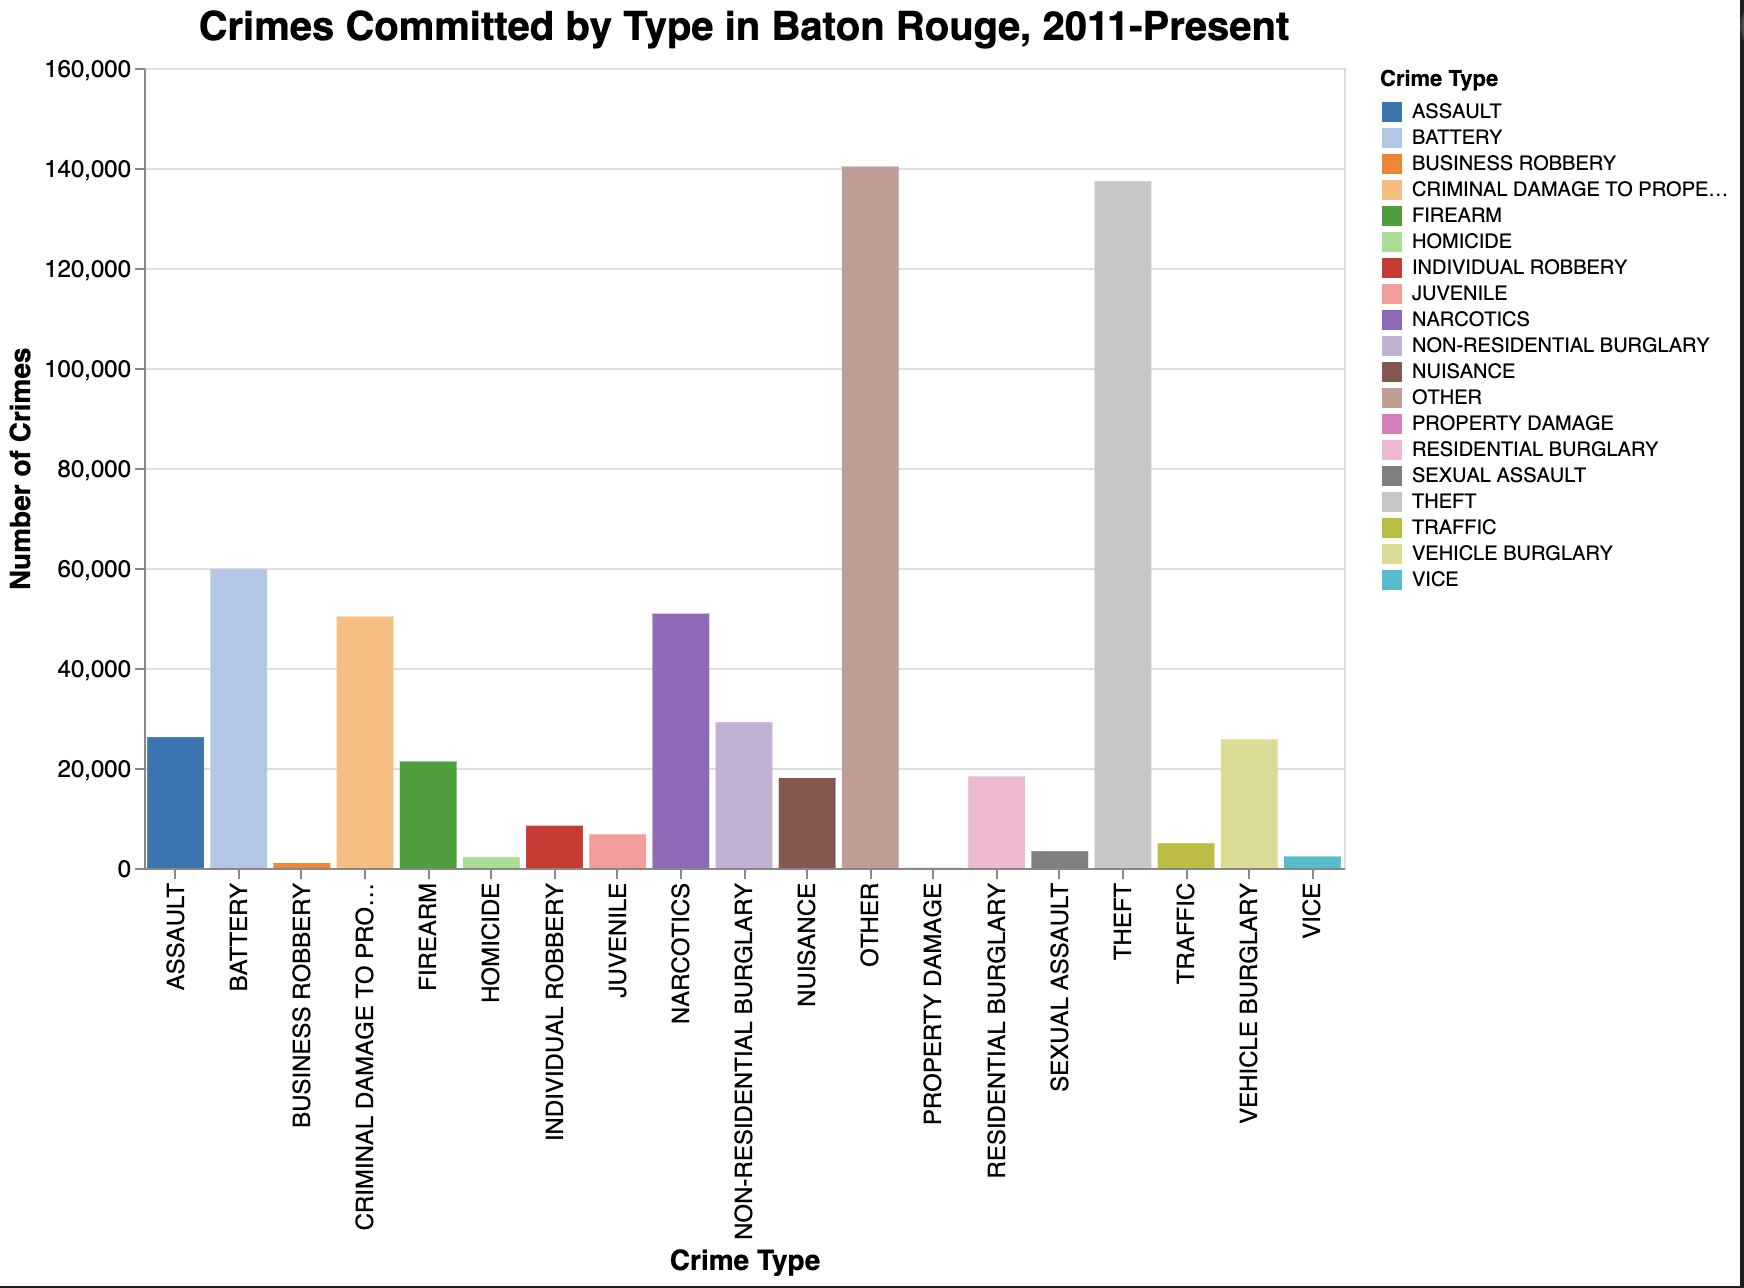

In [16]:
# sort by prevalence
prevalence = btr_num_df.sort_values(by='count',ascending=False)['crime_type'].to_list()

chart = alt.Chart(btr_num_df).mark_bar().encode(
    x = alt.X('crime_type',title='Crime Type',axis=alt.Axis(labelAngle=45),sort=prevalence),
    y = alt.Y('count',title='Number of Crimes'),
    color = alt.Color('crime_type:N', title='Crime Type', scale=alt.Scale(scheme='category20')),
).properties(
    title='Crimes Committed by Type in Baton Rouge, 2011-Present',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

chart.display()

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

adding screenshot of chart since it isn't rendering in GitHub even though it renders locally
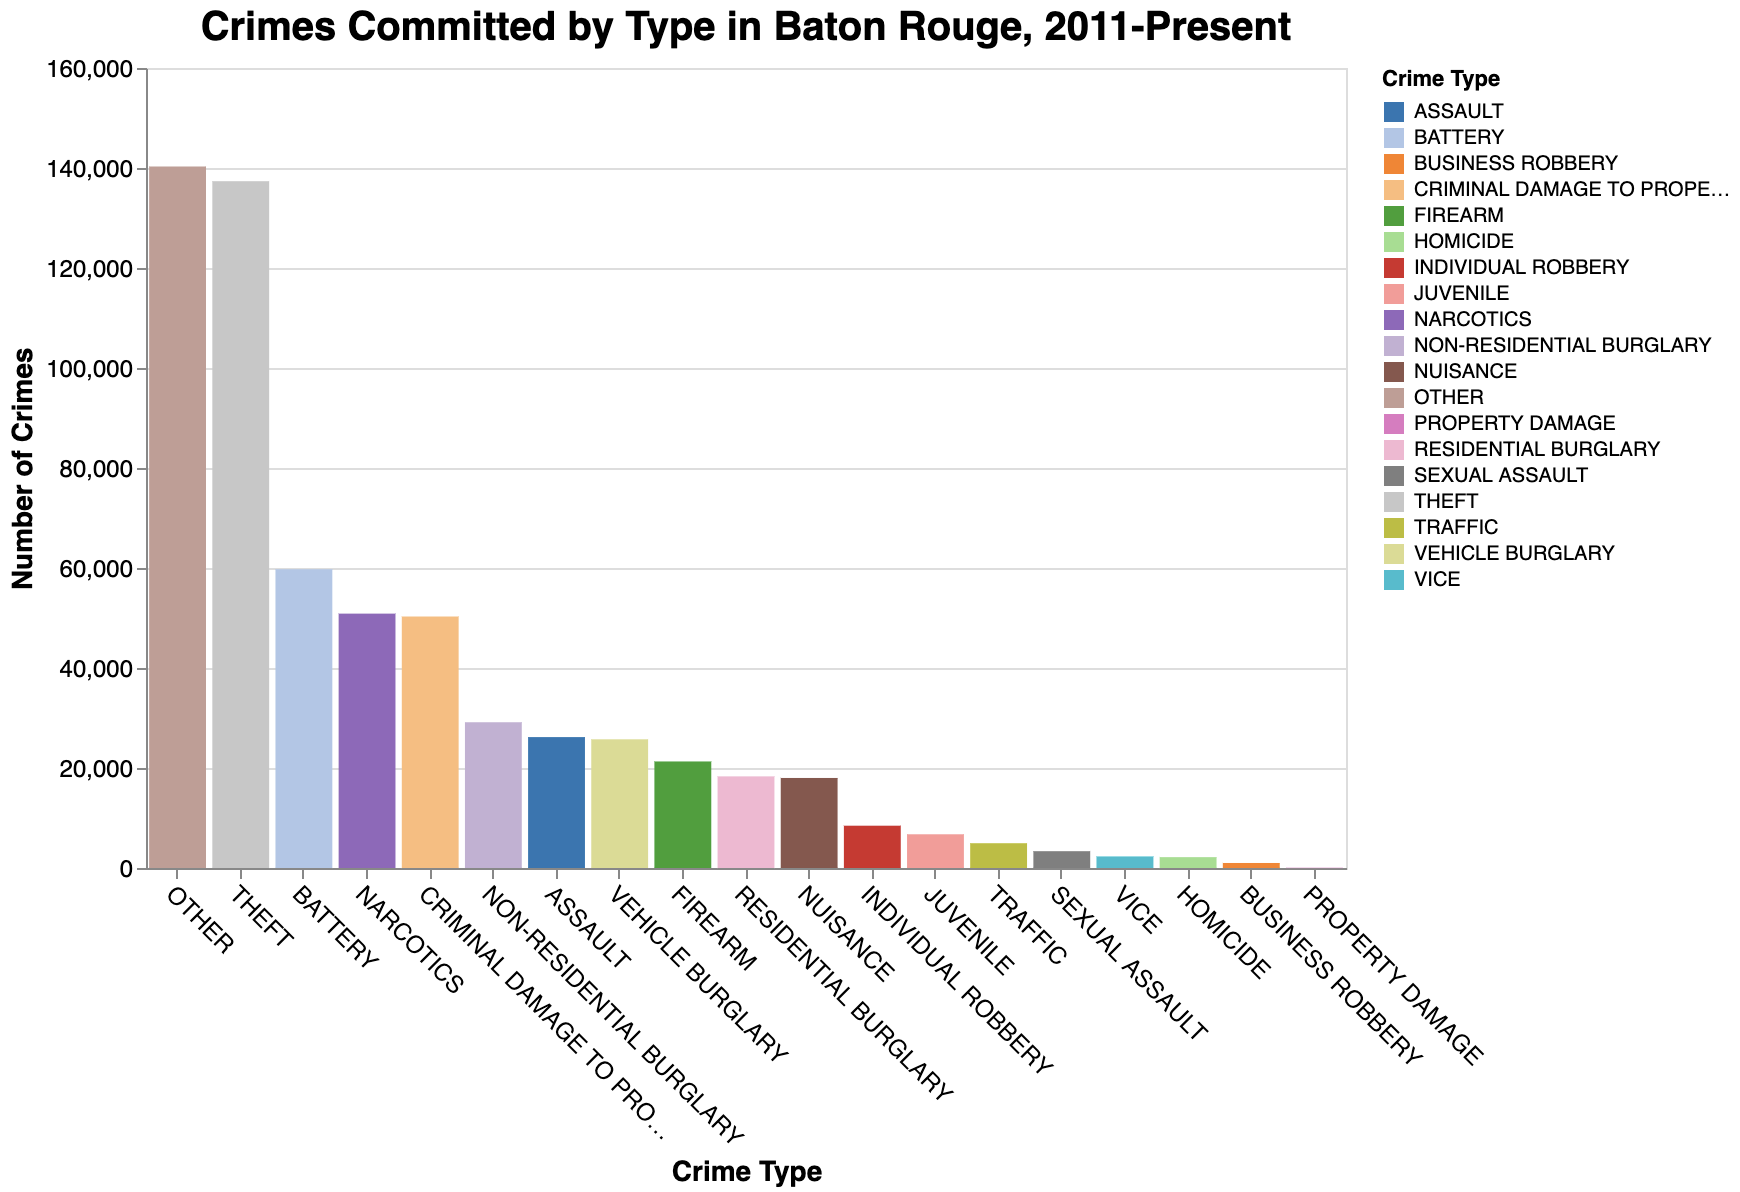

# Number of crimes committed in East Baton Rouge Parish by type

In [17]:
baton_rouge_parish_data.head()

,AGENCY,INCIDENT_NUMBER,CHARGE_ID,SUPPLEMENTAL,CHARGE_DATE,REPORT_DATE,APPROVED_DATE,ATTEMPTED_OR_COMMITTED,CITY,STATE,ZIP_CODE,DISTRICT,ZONE,SUBZONE,STATUTE_TITLE,STATUTE_DESCRIPTION,STATUTE_CATEGORY,CRIME_AGAINST,COUNCIL_DISTRICT,CRIME_PREVENTION_DISTRICT,NEIGHBORHOOD
0,BRPD,23-087127,D607D172-E178-409D-AEB1-1E7AB454849F,0.0,08/30/2023 04:51:36 PM,08/30/2023 05:00:32 PM,09/08/2023 08:26:03 AM,COMMITTED,BATON ROUGE,LA,70802.0,5,5A,5A1,13:106.2,URINATING IN PUBLIC/CC,NUISANCE,NaN,NaN,NaN,NaN
1,BRPD,21-024820,8ED44BF4-B4C4-441D-B388-4A527668C62F,1.0,03/17/2021 11:44:00 AM,03/17/2021 12:01:06 PM,09/03/2021 01:20:51 PM,COMMITTED,BATON ROUGE,LA,70805.0,4,4E,4E2,32:863,PROOF OF INSURANCE REQ,TRAFFIC,NaN,NaN,NaN,NaN
2,BRPD,20-015806,11241477-EE66-43C7-B505-7C8082A70C16,4.0,09/10/2020 12:00:00 PM,09/08/2023 05:52:09 AM,09/08/2023 06:32:25 AM,COMMITTED,BATON ROUGE,LA,70802.0,NaN,NaN,NaN,14:67,THEFT,THEFT,PROPERTY,NaN,NaN,NaN
3,BRPD,20-064955,38887E1F-48AB-40B3-8252-0364351BB3A0,5.0,07/26/2020 12:18:00 PM,10/19/2023 06:56:57 PM,10/19/2023 07:07:49 PM,COMMITTED,BATON ROUGE,LA,70802.0,NaN,NaN,NaN,32:415,D/L SUSP/REV,TRAFFIC,NaN,NaN,NaN,NaN
4,BRPD,23-087127,8F1536E8-F6AC-4732-89FC-9E360B95DF26,0.0,08/30/2023 04:51:36 PM,08/30/2023 05:00:32 PM,09/08/2023 08:26:03 AM,COMMITTED,BATON ROUGE,LA,70802.0,5,5A,5A1,6:428,LITTER IN PUBLIC PLACES,NUISANCE,NaN,NaN,NaN,NaN


In [18]:
val_counts(baton_rouge_parish_data)

Column name: AGENCY
AGENCY
EBRSO    135051
BRPD     131135
Name: count, dtype: int64
--------------------------------------------------

Column name: INCIDENT_NUMBER
INCIDENT_NUMBER
22-011857    51
22-062024    47
23-002745    38
22-048134    33
22-004270    32
             ..
22-035226     1
23-053787     1
21-045279     1
23-009023     1
21-049172     1
Name: count, Length: 180234, dtype: int64
--------------------------------------------------

Column name: CHARGE_ID
CHARGE_ID
508305                                  15
508304                                  15
320948                                   7
545049                                   7
550607                                   6
                                        ..
DF4CCCF3-5171-46AA-85B2-7A9658DC5B17     1
289F31E4-83B0-4122-9CE4-29E65223A3AE     1
0B2D0414-32DE-4AB7-81C1-5709ABF5CB13     1
3241890F-597D-4B1A-B813-FCD0614EF504     1
DD88FB73-25B0-4EDC-BE6C-E21A78D86E61     1
Name: count, Length: 265651, dtype: int64


In [19]:
# filter out attempted
ebrp_num_df = baton_rouge_parish_data[baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'COMMITTED']

In [20]:
val_counts(ebrp_num_df)

Column name: AGENCY
AGENCY
EBRSO    133775
BRPD     118996
Name: count, dtype: int64
--------------------------------------------------

Column name: INCIDENT_NUMBER
INCIDENT_NUMBER
22-011857    51
22-062024    47
23-002745    38
22-048134    33
22-004270    32
             ..
22-049965     1
23-006183     1
22-043280     1
21-088646     1
21-049172     1
Name: count, Length: 173361, dtype: int64
--------------------------------------------------

Column name: CHARGE_ID
CHARGE_ID
257F3B95-5DC4-410A-8C15-3884D2D2F219    2
B32AF519-1E8D-48C3-8500-4DC3BAF69582    2
9FD1DE0C-D5BC-4D48-8B88-D778536E2B30    2
241EC080-800F-4080-BEE1-A1070003A06E    2
936ABFB2-3E25-4000-8658-E68D65DE13F0    2
                                       ..
2605F95E-DC3E-4090-A099-91F0E5BA69DE    1
FD4C405A-D1A2-4B0D-A3E6-912364CEC522    1
9C7A5DC8-145E-4566-8D8B-54539DC772EB    1
F5B8972D-F554-419E-A630-C13326150AF3    1
DD88FB73-25B0-4EDC-BE6C-E21A78D86E61    1
Name: count, Length: 252581, dtype: int64
-----------

In [21]:
# drop statute category not used
print(f'befor drop: {ebrp_num_df.shape}')
ebrp_num_df = ebrp_num_df[ebrp_num_df['STATUTE_CATEGORY'] != 'NOT USED']
print(f'after drop: {ebrp_num_df.shape}')

befor drop: (252771, 21)
after drop: (252638, 21)


In [22]:
val_counts(ebrp_num_df)

Column name: AGENCY
AGENCY
EBRSO    133642
BRPD     118996
Name: count, dtype: int64
--------------------------------------------------

Column name: INCIDENT_NUMBER
INCIDENT_NUMBER
22-011857    51
22-062024    47
23-002745    38
22-048134    33
22-004270    32
             ..
21-027597     1
24-008164     1
24-008789     1
23-500319     1
21-049172     1
Name: count, Length: 173296, dtype: int64
--------------------------------------------------

Column name: CHARGE_ID
CHARGE_ID
B6D78DE8-55C2-4DD2-A79A-862F9EB8E928    2
8186DEFF-AE30-4072-AE0C-DC9AE6E2203E    2
A9D5B4BE-8F22-4271-8F50-EA1847871B1E    2
29F9A624-5FF7-4999-9AC3-8680FCBB718A    2
8F1B8200-DF58-4015-A167-1601FE01CABB    2
                                       ..
455D9A36-1FBB-49BC-8555-C4DEFEFFAFA7    1
79E59600-0A92-42AB-846E-88B17BCE1491    1
C16ECC79-04BE-45FA-AB60-379BBC8D587F    1
FE0892C5-1931-432D-A90F-8D666AC4F354    1
DD88FB73-25B0-4EDC-BE6C-E21A78D86E61    1
Name: count, Length: 252448, dtype: int64
-----------

In [23]:
ebrp_num_df = ebrp_num_df.groupby('STATUTE_CATEGORY').count().reset_index()
ebrp_num_df.head()

,STATUTE_CATEGORY,AGENCY,INCIDENT_NUMBER,CHARGE_ID,SUPPLEMENTAL,CHARGE_DATE,REPORT_DATE,APPROVED_DATE,ATTEMPTED_OR_COMMITTED,CITY,STATE,ZIP_CODE,DISTRICT,ZONE,SUBZONE,STATUTE_TITLE,STATUTE_DESCRIPTION,CRIME_AGAINST,COUNCIL_DISTRICT,CRIME_PREVENTION_DISTRICT,NEIGHBORHOOD
0,ASSAULT,7026,7026,7026,7026,7026,7026,7026,7026,6969,6973,6947,5897,5897,5292,7026,7026,6876,6381,764,6381
1,BATTERY,22616,22615,22616,22616,22616,22616,22616,22616,22316,22329,22243,18254,18254,15742,22616,22616,21948,20210,2859,20210
2,BUSINESS ROBBERY,113,113,113,113,113,113,113,113,110,109,109,92,92,83,113,113,109,93,13,93
3,CRIMINAL DAMAGE TO PROPERTY,17786,17786,17786,17786,17786,17786,17786,17786,17627,17637,17602,14372,14372,11964,17786,17786,16900,16566,2189,16566
4,FIREARM,6611,6610,6611,6611,6611,6611,6611,6611,6555,6556,6525,5271,5271,4931,6611,6611,6196,5504,708,5504


In [24]:
# drop cols
ebrp_num_df = ebrp_num_df[['STATUTE_CATEGORY','CHARGE_DATE']]
ebrp_num_df.head()

,STATUTE_CATEGORY,CHARGE_DATE
0,ASSAULT,7026
1,BATTERY,22616
2,BUSINESS ROBBERY,113
3,CRIMINAL DAMAGE TO PROPERTY,17786
4,FIREARM,6611


In [25]:
# rename cols
ebrp_num_df = ebrp_num_df.rename(columns={'CHARGE_DATE':'COUNT'})
ebrp_num_df.head(20)

,STATUTE_CATEGORY,COUNT
0,ASSAULT,7026
1,BATTERY,22616
2,BUSINESS ROBBERY,113
3,CRIMINAL DAMAGE TO PROPERTY,17786
4,FIREARM,6611
5,HOMICIDE,611
6,INDIVIDUAL ROBBERY,2272
7,JUVENILE,2392
8,NARCOTICS,13096
9,NON-RESIDENTIAL BURGLARY,19181


In [26]:
chart = alt.Chart(ebrp_num_df).mark_bar().encode(
    x = alt.X('STATUTE_CATEGORY',title='Crime Type'),
    y = alt.Y('COUNT',title='Number of Crimes'),
    color = alt.Color('STATUTE_CATEGORY:N', title='Crime Type', scale=alt.Scale(scheme='category20')),
).properties(
    title='Crimes Committed by Type in East Baton Rouge Parish, 2021-Present',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

chart.display()

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

adding screenshot of chart since it isn't rendering in GitHub even though it renders locally
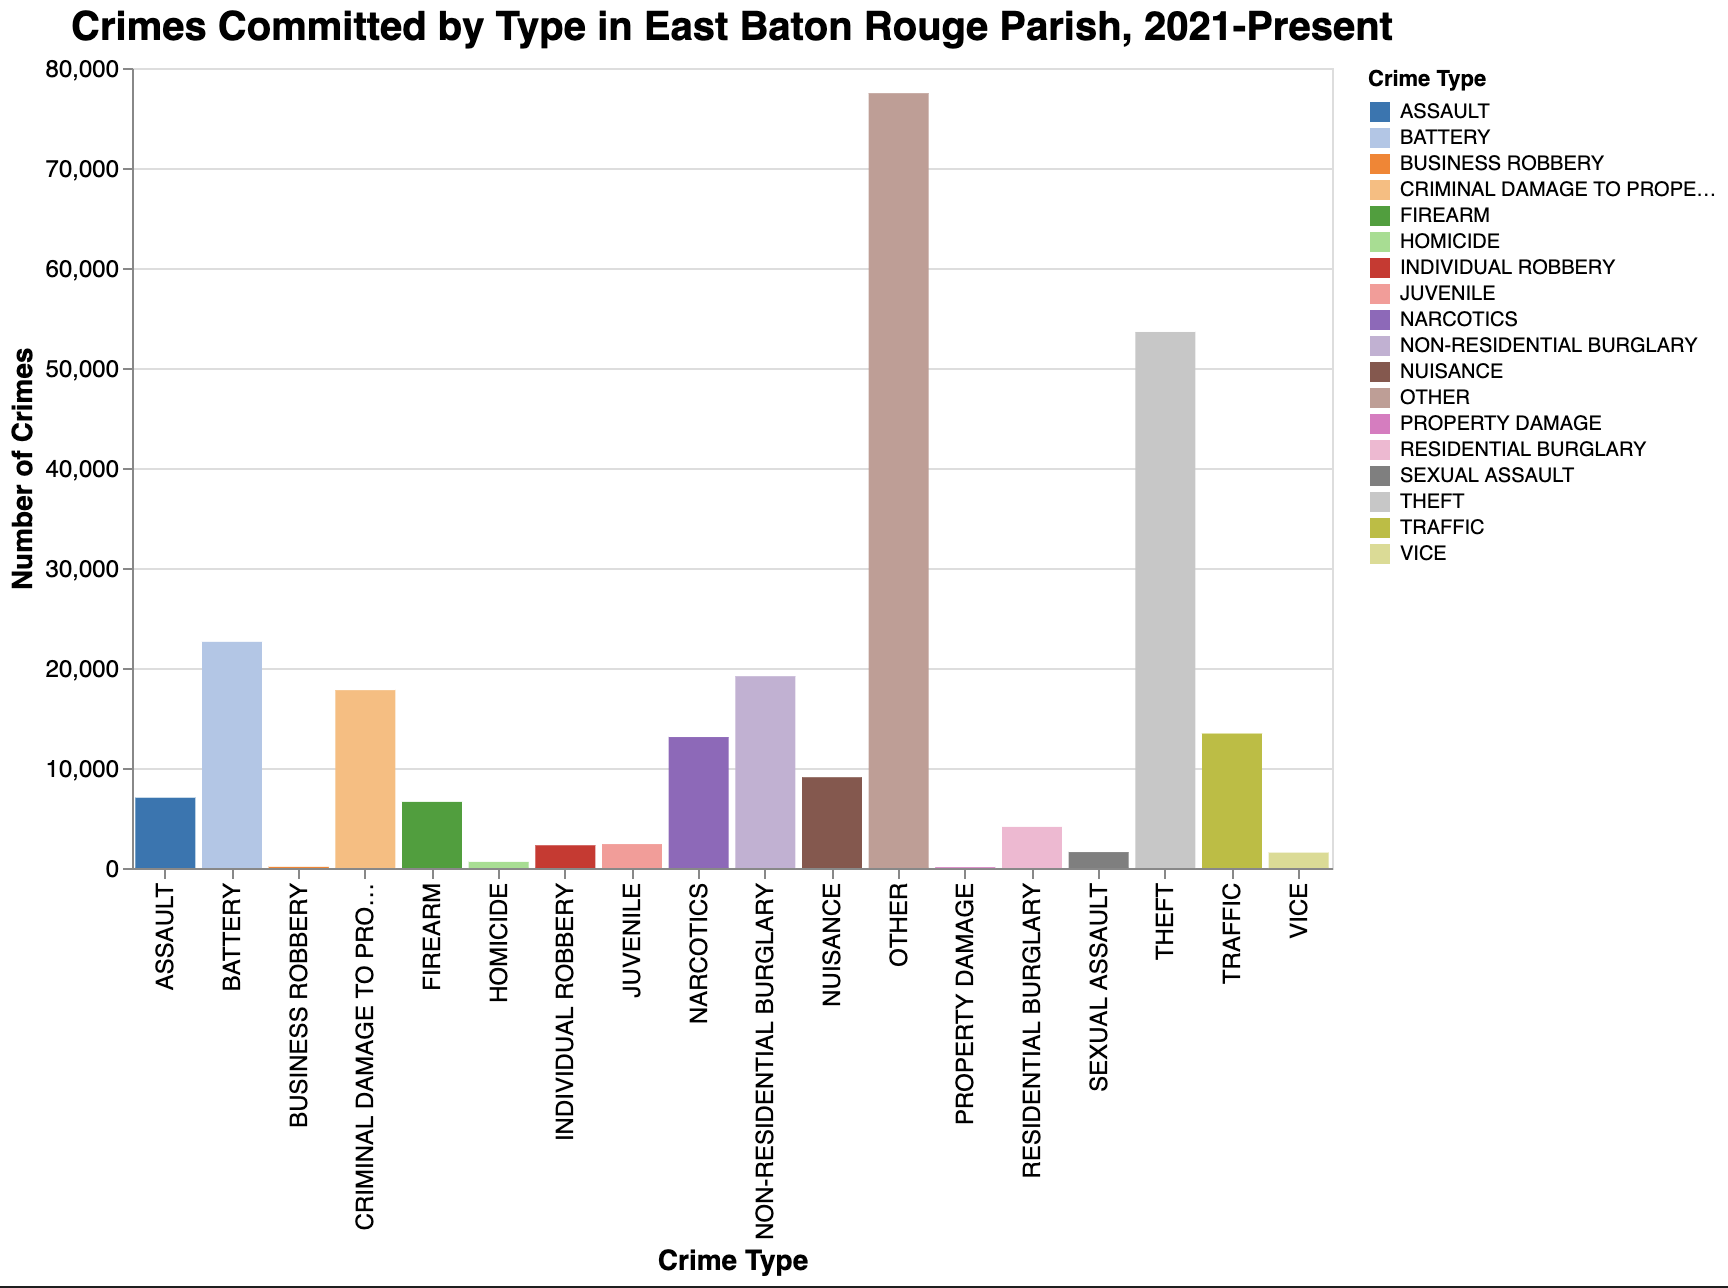

In [27]:
# sort by prevalence
prevalence = ebrp_num_df.sort_values(by='COUNT',ascending=False)['STATUTE_CATEGORY'].to_list()

chart = alt.Chart(ebrp_num_df).mark_bar().encode(
    x = alt.X('STATUTE_CATEGORY',title='Crime Type',axis=alt.Axis(labelAngle=45),sort=prevalence),
    y = alt.Y('COUNT',title='Number of Crimes'),
    color = alt.Color('STATUTE_CATEGORY:N', title='Crime Type', scale=alt.Scale(scheme='category20')),
).properties(
    title='Crimes Committed by Type in East Baton Rouge Parish, 2021-Present',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

chart.display()

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

adding screenshot of chart since it isn't rendering in GitHub even though it renders locally
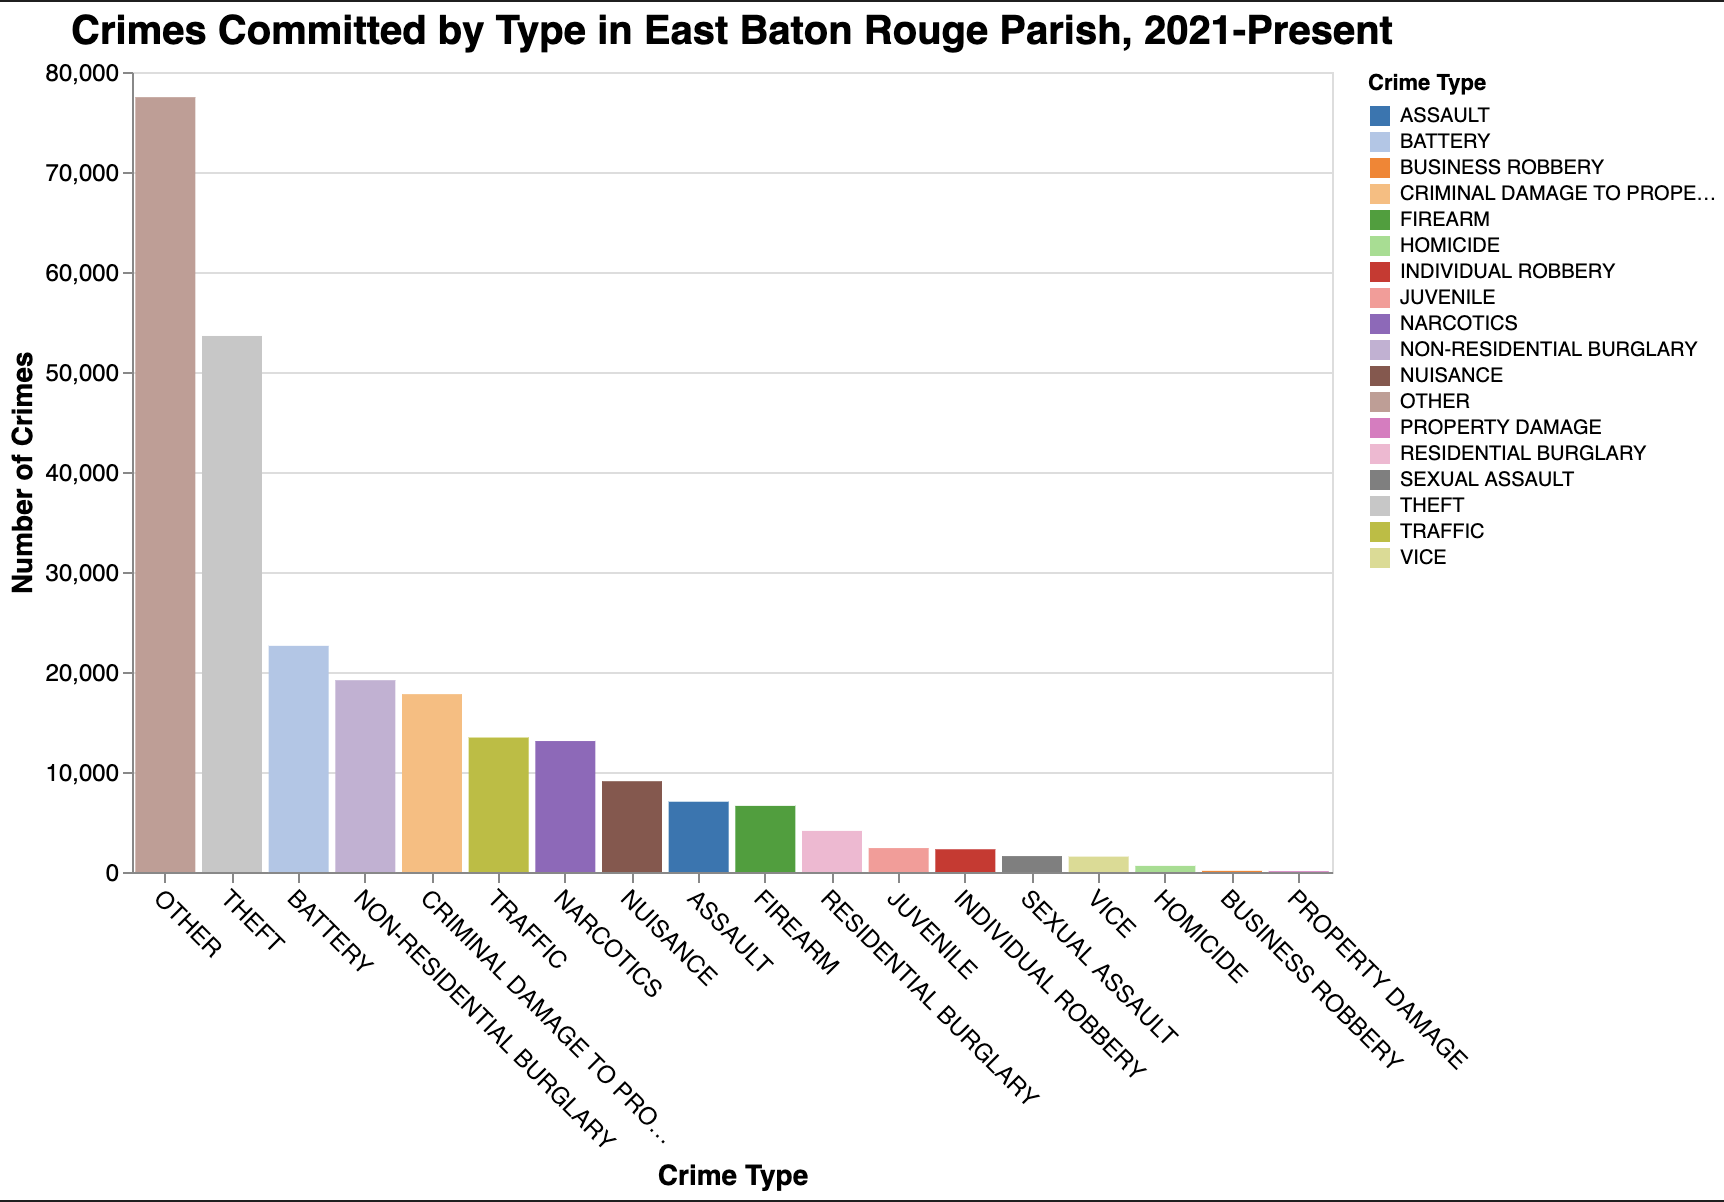

# Other Statute Category - Baton Rouge

In [28]:
# understand other category a bit better
btr_other = baton_rouge_2011_present_data[baton_rouge_2011_present_data['crime_type'] == 'OTHER']
btr_other.head()

,Unnamed: 0,report_number,offense_date,offense_time,crime_type,attempted_or_committed,crime_description,street_address,city,state,zip_code,district,council_district,crime_prevention_district
12,12,1900115996.0,11/18/2019,04:29:00 PM,OTHER,COMMITTED,RESISTING AN OFFICER/CC,FLORI ST / N 14TH ST,BATON ROUGE,LA,NaN,1,NaN,NaN
20,20,1900114931.0,11/15/2019,01:18:00 AM,OTHER,COMMITTED,D/L SUSP/REV,500 BURBANK DR,BATON ROUGE,LA,70810.0,2,3.0,NONE
26,26,1300109756.0,12/21/2013,04:30:00 PM,OTHER,COMMITTED,RECK OPER OF VEHICLE/CC,10600 CHOCTAW,BATON ROUGE,LA,70815.0,NaN,6.0,NONE
27,27,1900117452.0,11/22/2019,09:00:00 PM,OTHER,COMMITTED,DRINKING IN PUBLIC/CC,4300 NICHOLSON,BATON ROUGE,LA,70820.0,NaN,12.0,NONE
34,34,1900115177.0,11/15/2019,09:30:00 PM,OTHER,COMMITTED,DRINKING IN PUBLIC/CC,1100 BOB PETIT BL,BATON ROUGE,LA,70820.0,2,12.0,NONE


In [29]:
# check shapes
baton_rouge_2011_present_data[baton_rouge_2011_present_data['attempted_or_committed'] == 'COMMITTED'].shape

(606379, 14)

In [30]:
btr_other.shape

(142022, 14)

In [31]:
# filter out attempted
print(f'shape befor drop: {btr_other.shape}')
btr_other = btr_other[btr_other['attempted_or_committed'] == 'COMMITTED']
print(f'shape after drop: {btr_other.shape}')

shape befor drop: (142022, 14)
shape after drop: (140300, 14)


In [32]:
btr_other = btr_other.groupby('crime_description').count()
btr_other.head()

,Unnamed: 0,report_number,offense_date,offense_time,crime_type,attempted_or_committed,street_address,city,state,zip_code,district,council_district,crime_prevention_district
crime_description,,,,,,,,,,,,,
(ATTEMPTED) FIRST DEGREE MURDER,52,52,52,52,52,52,52,52,52,52,52,52,2
(ATTEMPTED) SECOND DEGREE MURDER,56,56,56,56,56,56,53,56,56,56,56,54,7
(NOW 14:98.7) UNLAWFUL REFUSAL SUBMIT/CHEMICAL TEST,17,17,17,16,17,17,17,17,17,16,17,16,16
"(NOW 14:98.8) OPER VEH WHILE D/L SUSPENDED, PRIOR OFF",156,156,156,155,156,156,156,156,156,152,150,152,152
2 TAIL LAMPS REQUIRED,3,3,3,3,3,3,3,3,3,3,3,3,2


In [33]:
# drop cols
btr_other = btr_other[['Unnamed: 0']]
btr_other.head()

,Unnamed: 0
crime_description,
(ATTEMPTED) FIRST DEGREE MURDER,52
(ATTEMPTED) SECOND DEGREE MURDER,56
(NOW 14:98.7) UNLAWFUL REFUSAL SUBMIT/CHEMICAL TEST,17
"(NOW 14:98.8) OPER VEH WHILE D/L SUSPENDED, PRIOR OFF",156
2 TAIL LAMPS REQUIRED,3


In [34]:
# rename cols
btr_other = btr_other.rename(columns={'Unnamed: 0':'count'})
btr_other.head()

,count
crime_description,
(ATTEMPTED) FIRST DEGREE MURDER,52
(ATTEMPTED) SECOND DEGREE MURDER,56
(NOW 14:98.7) UNLAWFUL REFUSAL SUBMIT/CHEMICAL TEST,17
"(NOW 14:98.8) OPER VEH WHILE D/L SUSPENDED, PRIOR OFF",156
2 TAIL LAMPS REQUIRED,3


In [35]:
# check highest counts
btr_other.sort_values(by='count',inplace=True,ascending=False)
btr_other.head(50)


,count
crime_description,
FUGITIVE,10661
D W I /CC,8656
DRINKING IN PUBLIC/CC,6842
RESISTING AN OFFICER,6555
RECK OPER OF VEHICLE/CC,5838
BURGLARY/S INHAB DWELLING,5820
PURCH/POSS ALC PERS UNDER 21/CC,4691
DRINKING IN A MOTOR VEHICLE/CC,4438
RESISTING AN OFFICER/CC,4201


In [36]:
# rename to create some categories
btr_other.rename(index={
    'D W I /CC':'D W I',
    'DRINKING IN PUBLIC/CC':'DRINKING IN PUBLIC',
    'RESISTING AN OFFICER/CC':'RESIST OR INTERF W AN OFFICER',
    'RESISTING AN OFFICER':'RESIST OR INTERF W AN OFFICER',
    'RECK OPER OF VEHICLE/CC':'RECK OPER OF VEHICLE',
    'PURCH/POSS ALC PERS UNDER 21/CC':'PURCH/POSS ALC PERS UNDER 21',
    'DRINKING IN A MOTOR VEHICLE/CC':'DRINKING IN A MOTOR VEHICLE',
    'DIST/PEACE/INTOXICATION/CC':'DISTURBING THE PEACE',
    'DIST THE PEACE/CC':'DISTURBING THE PEACE',
    'D/L SUSP/REV':'TRAFFIC OR DRIVING VIOLATION',
    'D/L NOT IN POSS/CC':'TRAFFIC OR DRIVING VIOLATION',
    'IMPROPER LANE USAGE/CC':'TRAFFIC OR DRIVING VIOLATION',
    'DIST/PEACE/FISTIC ENCOUNTER/CC':'DISTURBING THE PEACE',
    'INSURANCE REQUIRED/CC':'TRAFFIC OR DRIVING VIOLATION',
    'VIOLATIONS OF PROTECTIVE ORDERS':'VIOL OF PROTECTIVE ORDERS',
    'STOP SIGN/YIELD SIGN/CC':'TRAFFIC OR DRIVING VIOLATION',
    'HEADLIGHTS REQUIRED/CC':'TRAFFIC OR DRIVING VIOLATION',
    'CARELESS DRIVING':'TRAFFIC OR DRIVING VIOLATION',
    'D/L REQUIRED (STATE)':'TRAFFIC OR DRIVING VIOLATION',
    'RED LIGHT/DISOBEY/CC':'TRAFFIC OR DRIVING VIOLATION',
    'OTHER LAWS OF THE ROAD/CC':'TRAFFIC OR DRIVING VIOLATION',
    'LIC PLATE SWITCHED':'TRAFFIC OR DRIVING VIOLATION',
    'SEAT BELT VIOL/CC':'TRAFFIC OR DRIVING VIOLATION',
    'HIT & RUN/CC':'TRAFFIC OR DRIVING VIOLATION',
    'MVI REQUIRED/CC':'TRAFFIC OR DRIVING VIOLATION',
    'SPEEDING/CC':'TRAFFIC OR DRIVING VIOLATION',
    'LIC PLATE REQUIRED/CC':'TRAFFIC OR DRIVING VIOLATION',
    'FAIL/SIGNAL':'TRAFFIC OR DRIVING VIOLATION',
    'EQUIPMENT VIOL/CC':'TRAFFIC OR DRIVING VIOLATION',
    'DIST/PEACE':'DISTURBING THE PEACE',
    'DIST/PEACE/FISTIC ENCOUNTER':'DISTURBING THE PEACE',
    'DIST/PEACE/OFFENSIVE NOISES/CC':'DISTURBING THE PEACE',
    'PUBLIC DRINKING PROHIBITED (OPEN CONTAINER) /CC':'DRINKING IN PUBLIC',
    'POSSESSION ALCOHOL IN VEHICLE':'DRINKING IN A MOTOR VEHICLE',
    'AGGRAVATED FLIGHT FROM AN OFFICER':'RESISTING AN OFFICER',
    'INTERFERE W/OFFICER/CC':'RESIST OR INTERF W AN OFFICER',
    'IMPROPER LANE USAGE':'TRAFFIC OR DRIVING VIOLATION',
    'FAIL MAIN CONTROL (CARELESS OPERATION)':'TRAFFIC OR DRIVING VIOLATION',
    'UNAU USE/MOVEABLE/CC':'TRAFFIC OR DRIVING VIOLATION',
    'INSURANCE REQUIRED':'TRAFFIC OR DRIVING VIOLATION',
    'FAIL TO REG VEH':'TRAFFIC OR DRIVING VIOLATION',
    'HIT & RUN':'TRAFFIC OR DRIVING VIOLATION',
    'SEAT BELT VIOL':'TRAFFIC OR DRIVING VIOLATION',
    'OBSTRUCTION HWY/SIMPLE/CC':'TRAFFIC OR DRIVING VIOLATION',
    'UNAUTH USE/MOVABLE':'TRAFFIC OR DRIVING VIOLATION',
    'FAIL MAIN CONTROL/CC':'TRAFFIC OR DRIVING VIOLATION',
    'RECK OPER OF VEHICLE':'TRAFFIC OR DRIVING VIOLATION',
    'DISTURBING THE PEACE (INTOXICATION)':'DISTURBING THE PEACE',
    'DISTURBING THE PEACE (FISTIC)':'DISTURBING THE PEACE',
    'DIST/PEACE/INTOXICATED':'DISTURBING THE PEACE',
    'DRINKING/ MOTOR VEHICLE (OPEN CONTAINER) /CC':'DRINKING IN A MOTOR VEHICLE',
    'RESISTING A OFFICER FORCE OR VIOLENCE':'RESIST OR INTERF W AN OFFICER',
    'RESISTING AN OFFICER':'RESIST OR INTERF W AN OFFICER',
    'MISREP OF AGE TO OBTAIN ALCOHOLIC BEV':'UNDERAGE DRINKING',
    'PURCH/POSS ALC PERS UNDER 21':'UNDERAGE DRINKING',
    'BURGLARY/S INHAB DWELLING':'UNAU ENTRY INHAB DWELLING',
    'MVI CERTIFICATES/FALSE':'TRAFFIC OR DRIVING VIOLATION',
    'STOP SIGN/YIELD SIGN':'TRAFFIC OR DRIVING VIOLATION',
    'LIC PLATE REQUIRED':'TRAFFIC OR DRIVING VIOLATION',
    'FAIL TO SIGNAL	':'TRAFFIC OR DRIVING VIOLATION',
    'CRIMINAL TRESSPASSING':'TRAFFIC OR DRIVING VIOLATION',
    'FOLLOWING TOO CLOSE/CC':'TRAFFIC OR DRIVING VIOLATION',
    'DRIV LEFT OF CENTER/CC	':'TRAFFIC OR DRIVING VIOLATION',
    'IMPROPER L/R TURNS/CC':'TRAFFIC OR DRIVING VIOLATION',
    'UNAU ENTRY INHAB DWELLING':'TRESSPASSING',
    'FLIGHT FROM OFFICER':'RESIST OR INTERF W AN OFFICER',
    'RESISTING A OFFICER FORCE OR VIOLENCE':'RESIST OR INTERF W AN OFFICER',
    'ILL USE OF 911/CC':'RESIST OR INTERF W AN OFFICER',
    'POSS ALC/BREC PARKS/CC':'DRINKING IN PUBLIC',
    'URINATING IN PUBLIC/CC':'URINATING IN PUBLIC',
    'ENT/REM AFTER FORB':'UNAU ENTRY INHAB DWELLING',
    'ILL USE OF 911/CC':'ILL USE OF 911',
    'OBST JUSTICE':'OBSTTRUCTION OF JUSTICE',
    'ARSON/SIMPLE':'ARSON',
    'ARSON/COMMUNICATE FALSE INFO':'ARSON',
    'KIDNAPPING/2ND DEGREE':'KIDNAPPING',
    'INTIM/PUBLIC':'PUBLIC INTIMACY',
    'MINORS/USE CDS IN PRESENCE':'DRUGS IN PRESENCE OF MINORS',
    'FAIL TO SIGNAL':'TRAFFIC OR DRIVING VIOLATION',
    'IMPROPER WINDOW TINT/CC':'TRAFFIC OR DRIVING VIOLATION',
    'DRIV LEFT OF CENTER/CC':'TRAFFIC OR DRIVING VIOLATION',
    'MAXIMUM SPEED LIMIT - SPEEDING':'TRAFFIC OR DRIVING VIOLATION',
    'OBST OF PUBLIC HWY/SIMPLE':'TRAFFIC OR DRIVING VIOLATION',
    'INSPECTION STICKER	':'TRAFFIC OR DRIVING VIOLATION',
    'CHILD RESTRAINT REQ':'TRAFFIC OR DRIVING VIOLATION',
    'RED LIGHT/DISOBEY':'TRAFFIC OR DRIVING VIOLATION',
    '(NOW 14:98.8) OPER VEH WHILE D/L SUSPENDED, PRIOR OFF':'TRAFFIC OR DRIVING VIOLATION',
    'WINDOW TINT / OBSCURING VIEW PROHIBITED':'TRAFFIC OR DRIVING VIOLATION',
    'UNAU ENTRY INHAB DWELLING':'TRESPASSING',
    'AIDING TO REMAIN ON PREMISES/CC':'TRESPASSING',
    'ILL USE OF 911':'RESIST OR INTERF W AN OFFICER',
    'RESISTING A OFFICER FORCE OR VIOLENCE':'RESIST OR INTERF W AN OFFICER',
    'OBSTTRUCTION OF JUSTICE':'OBSTRUCTION OF JUSTICE',
    'KIDNAPPING/SIMPLE':'KIDNAPPING',
    'ILL USE OF A WEAPON/CC':'ILL USE OF A WEAPON',
    'MISREPRESENTATION DURING BOOKING':'MISREP DUR BOOKING',
    'DISTURBING THE PEACE (OFFENSIVE NOISES)':'DISTURBING THE PEACE',
    'ONE WAY STREET/CC':'TRAFFIC OR DRIVING VIOLATION',
    'FAIL/YIELD LEFT TURN/CC':'TRAFFIC OR DRIVING VIOLATION',
    'EQUIPMENT VIOL':'TRAFFIC OR DRIVING VIOLATION',
    'DISOBEY CONTROL DEV/CC':'TRAFFIC OR DRIVING VIOLATION',
    'CYBERSTALKING/ELECTRONIC MAIL':'CYBERSTALKING',
    'DIST/PEACE/TUMULTUOUS MANNR/CC':'DISTURBING THE PEACE',
    'TRESSPASSING':'TRESPASSING',
    'CRIM TRESPASS':'TRESPASSING',
    'FALSE IMPRISONMENT/CC':'FALSE IMPRISONMENT',
    'UNLAWFUL CONSUMPTION OF ALC BY PERSON UNDER 21':'UNDERAGE DRINKING',
    'FLEE TO ELUDE POLICE/CC':'RESIST OR INTERF W AN OFFICER',
    'INTERFER W/LAW ENFORCEMENT INVESTIGATION':'RESIST OR INTERF W AN OFFICER',
    'OBST PUBLIC HWY/AGG':'OBSTRUCTION OF PUB PASSAGE',
    'OBST OF PUB PASSAGE':'OBSTRUCTION OF PUB PASSAGE',
    'Contraband Penal Institution':'CONTRABAND IN PENAL INST',
    'KIDNAPPING/AGG':'KIDNAPPING',
    'HEADLIGHTS REQUIRED':'TRAFFIC OR DRIVING VIOLATION',
    'REG REQ IN VEHICLE':'TRAFFIC OR DRIVING VIOLATION',
    'LEASED MOVEABLES FALSE REPRES':'TRAFFIC OR DRIVING VIOLATION',
    'DRIV OVER MEDIAN/CC':'TRAFFIC OR DRIVING VIOLATION',
    'OPERATING VEHICLE WHILE D/L SUSPENDED, PRIOR OFF.':'TRAFFIC OR DRIVING VIOLATION',
    'LIC PLATE REQUIRED/STATE':'TRAFFIC OR DRIVING VIOLATION',
    'D/L FAIL CHG ADDRESS /CC	':'TRAFFIC OR DRIVING VIOLATION',
    'INSPECTION STICKER	':'TRAFFIC OR DRIVING VIOLATION',
    'OPER VEH W/O LAW PRESENCE':'TRAFFIC OR DRIVING VIOLATION',
    'FALSE IMP W/DANG WEA':'FALSELY PUBLISH DANGEROUS WEATHER',
    'RESISTING A POLICE OFFICER WITH FORCE OR VIOLENCE.':'RESIST OR INTERF W AN OFFICER',
    'RESISTING A OFFICER FORCE OR VIOLENCE':'RESIST OR INTERF W AN OFFICER',
    'RESISTING AN OFFICER - REFUSAL TO GIVE NAME OR MAKE IDENTITY KNOWN':'RESIST OR INTERF W AN OFFICER',
    'PURCH/POSS ALCOHOL FOR MINOR/CC':'UNDERAGE DRINKING',
    'SERVE/ALC TO PERSON UNDER 21/CC':'UNDERAGE DRINKING',
    'DISTURBING THE PEACE (TUMULTUOUS MANNER)':'DISTURBING THE PEACE',
    'REQ TAIL LAMPS':'TRAFFIC OR DRIVING VIOLATION',
    'INSPECTION STICKER':'TRAFFIC OR DRIVING VIOLATION',
    'FAIL/YIELD PRIVATE DRIVE/CC':'TRAFFIC OR DRIVING VIOLATION',
    'D/L FAIL CHG ADDRESS /CC':'TRAFFIC OR DRIVING VIOLATION',
    'D/L EXPIRED':'TRAFFIC OR DRIVING VIOLATION',
    'ARSON/AGG':'ARSON',
    'FLIGHT FROM AN OFFICER':'RESIST OR INTERF W AN OFFICER',
    'RESISTING A OFFICER FORCE OR VIOLENCE':'RESIST OR INTERF W AN OFFICER',
    'DIST/PEACE/OFFENSIVE WORDS':'DISTURBING THE PEACE',
    'INTERFERENCE WITH AN OFFICER':'RESIST OR INTERF W AN OFFICER',
    'RESISTING A OFFICER FORCE OR VIOLENCE':'RESIST OR INTERF W AN OFFICER',
    'RESIST OR INTERF W AN OFFICER':'RESIST/INTERF W OFFICER',
    'TRAFFIC OR DRIVING VIOLATION':'TRAFFIC/DRIV VIOLATION',


}, inplace=True)
btr_other.head(50)


,count
crime_description,
FUGITIVE,10661
D W I,8656
DRINKING IN PUBLIC,6842
RESIST OR INTERF W AN OFFICER,6555
RECK OPER OF VEHICLE,5838
UNAU ENTRY INHAB DWELLING,5820
PURCH/POSS ALC PERS UNDER 21,4691
DRINKING IN A MOTOR VEHICLE,4438
RESIST OR INTERF W AN OFFICER,4201


In [37]:
# recombine description categories
btr_other = btr_other.groupby('crime_description').agg({
    'count':'sum'
})
btr_other.sort_values(by='count',inplace=True,ascending=False)
btr_other.head(50)

,count
crime_description,
TRAFFIC OR DRIVING VIOLATION,28381
RESIST OR INTERF W AN OFFICER,13213
DISTURBING THE PEACE,12278
FUGITIVE,10661
D W I,9859
DRINKING IN PUBLIC,7802
UNAU ENTRY INHAB DWELLING,6795
DRINKING IN A MOTOR VEHICLE,6046
RECK OPER OF VEHICLE,5838


In [38]:
btr_other = btr_other.drop('ATTEMPTED (Code Modifier)',axis=0)
btr_other.head(50)

,count
crime_description,
TRAFFIC OR DRIVING VIOLATION,28381
RESIST OR INTERF W AN OFFICER,13213
DISTURBING THE PEACE,12278
FUGITIVE,10661
D W I,9859
DRINKING IN PUBLIC,7802
UNAU ENTRY INHAB DWELLING,6795
DRINKING IN A MOTOR VEHICLE,6046
RECK OPER OF VEHICLE,5838


In [39]:
btr_other.drop(['PRINCIPAL(Code Modifier)','ATTEMPT'],axis=0,inplace=True)

In [40]:
# get most frequent
btr_other = btr_other.iloc[:15]
btr_other.head(20)

,count
crime_description,
TRAFFIC OR DRIVING VIOLATION,28381
RESIST OR INTERF W AN OFFICER,13213
DISTURBING THE PEACE,12278
FUGITIVE,10661
D W I,9859
DRINKING IN PUBLIC,7802
UNAU ENTRY INHAB DWELLING,6795
DRINKING IN A MOTOR VEHICLE,6046
RECK OPER OF VEHICLE,5838


In [41]:
btr_other.reset_index(inplace=True)

In [42]:
order = btr_other.sort_values(by='count',ascending=False)['crime_description'].tolist()

chart = alt.Chart(btr_other).mark_bar().encode(
    x = alt.X('crime_description',title='Crime Description',axis=alt.Axis(labelAngle=45),sort=order),
    y = alt.Y('count',title='Number of Crimes'),
    color = alt.Color('crime_description:N', title='Crime Description', scale=alt.Scale(scheme='category20')),
).properties(
    title='Description of Crimes Classified as OTHER in Baton Rouge, 2011-Present',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

chart.display()

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

adding screenshot of chart since it isn't rendering in GitHub even though it renders locally
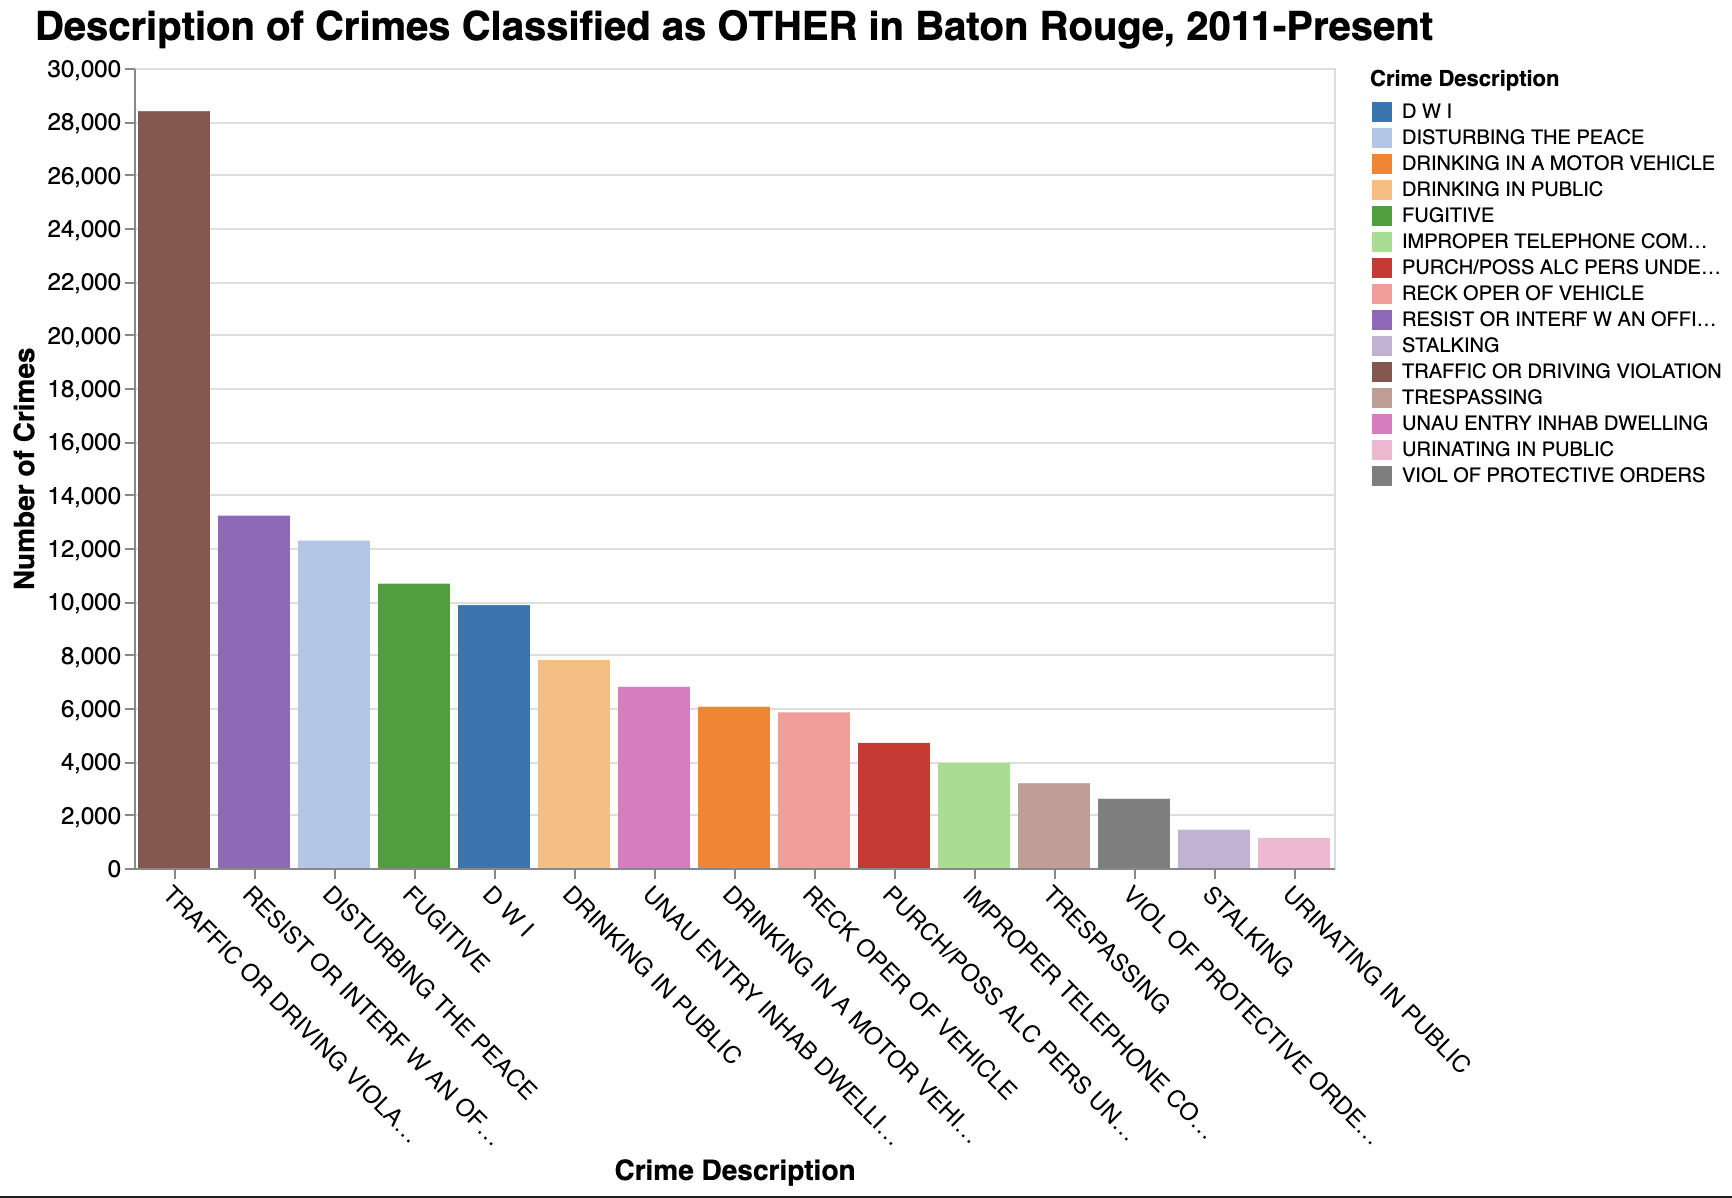

# Attempted vs Committed Crimes in Baton Rouge, 2011-present

In [43]:
baton_rouge_2011_present_data.shape

(621715, 14)

In [44]:
baton_rouge_2011_present_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621715 entries, 0 to 621714
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 621715 non-null  int64  
 1   report_number              614400 non-null  object 
 2   offense_date               621715 non-null  object 
 3   offense_time               618561 non-null  object 
 4   crime_type                 621715 non-null  object 
 5   attempted_or_committed     621443 non-null  object 
 6   crime_description          621714 non-null  object 
 7   street_address             597358 non-null  object 
 8   city                       612949 non-null  object 
 9   state                      613073 non-null  object 
 10  zip_code                   616669 non-null  float64
 11  district                   590615 non-null  object 
 12  council_district           608314 non-null  float64
 13  crime_prevention_district  50

In [45]:
baton_rouge_2011_present_data.head()

,Unnamed: 0,report_number,offense_date,offense_time,crime_type,attempted_or_committed,crime_description,street_address,city,state,zip_code,district,council_district,crime_prevention_district
0,0,NaN,11/01/2019,06:44:00 PM,JUVENILE,COMMITTED,CHILD DESERTION,NaN,NaN,NaN,70808.0,2,12.0,NONE
1,1,NaN,01/01/2013,12:00:00 AM,SEXUAL ASSAULT,COMMITTED,RAPE/AGG (ORAL),NaN,NaN,NaN,NaN,3,NaN,NaN
2,2,NaN,04/02/2020,11:00:00 AM,JUVENILE,COMMITTED,EXPLOITATION OF THE INFIRMED,NaN,NaN,NaN,70810.0,2,12.0,NONE
3,3,NaN,02/13/2014,10:15:00 AM,SEXUAL ASSAULT,COMMITTED,RAPE/FORCIBLE (VAGINAL),NaN,NaN,NaN,70811.0,4,5.0,NONE
4,4,NaN,03/24/2019,01:00:00 AM,SEXUAL ASSAULT,COMMITTED,BATT/SEXUAL,NaN,NaN,NaN,70802.0,2,10.0,NONE


In [46]:
# typecast offense_date as datetime
baton_rouge_2011_present_data['offense_date'] = pd.to_datetime(baton_rouge_2011_present_data['offense_date'])

# filter out data before 2011
print(f'shape befor drop: {baton_rouge_2011_present_data.shape}')
baton_rouge_2011_present_data = baton_rouge_2011_present_data[baton_rouge_2011_present_data['offense_date'] > '12/31/2010']
print(f'shape after drop: {baton_rouge_2011_present_data.shape}')

shape befor drop: (621715, 14)
shape after drop: (621692, 14)


In [47]:
baton_rouge_2011_present_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 621692 entries, 0 to 621714
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Unnamed: 0                 621692 non-null  int64         
 1   report_number              614377 non-null  object        
 2   offense_date               621692 non-null  datetime64[ns]
 3   offense_time               618538 non-null  object        
 4   crime_type                 621692 non-null  object        
 5   attempted_or_committed     621422 non-null  object        
 6   crime_description          621691 non-null  object        
 7   street_address             597345 non-null  object        
 8   city                       612929 non-null  object        
 9   state                      613053 non-null  object        
 10  zip_code                   616649 non-null  float64       
 11  district                   590601 non-null  object       

In [48]:
# determine what the most prevalent crimes are
baton_rouge_2011_present_data['crime_type'].value_counts()

crime_type
OTHER                          142022
THEFT                          140250
BATTERY                         59919
NARCOTICS                       50992
CRIMINAL DAMAGE TO PROPERTY     50477
NON-RESIDENTIAL BURGLARY        30844
VEHICLE BURGLARY                26535
ASSAULT                         26327
FIREARM                         21534
RESIDENTIAL BURGLARY            19751
NUISANCE                        18054
INDIVIDUAL ROBBERY               9173
HOMICIDE                         6989
JUVENILE                         6789
TRAFFIC                          5034
SEXUAL ASSAULT                   3515
VICE                             2311
BUSINESS ROBBERY                 1102
PROPERTY DAMAGE                    73
NOT USED                            1
Name: count, dtype: int64

In [49]:
# please note that i created these graphs before learning about groupby

In [50]:
# create a dictionary of prevalent crimes

burglary_types = ['NON-RESIDENTIAL BURGLARY','VEHICLE BURGLARY','RESIDENTIAL BURGLARY']
assault_types = ['ASSAULT','SEXUAL ASSAULT','INDIVIDUAL ROBBERY','BUSINESS ROBBERY']
# reminder for me to talk about the decisions i made for assault types in our report

prevalent_crimes = {
    'THEFT': (baton_rouge_2011_present_data['crime_type'] == 'THEFT').sum(), 
    'BATTERY': (baton_rouge_2011_present_data['crime_type'] == 'BATTERY').sum(),
    'NARCOTICS': (baton_rouge_2011_present_data['crime_type'] == 'NARCOTICS').sum(),
    'BURGLARY': (baton_rouge_2011_present_data['crime_type'].isin(burglary_types)).sum(),
    'ASSAULT': (baton_rouge_2011_present_data['crime_type'].isin(assault_types)).sum(),
    'FIREARM': (baton_rouge_2011_present_data['crime_type'] == 'FIREARM').sum(),
    'HOMICIDE': (baton_rouge_2011_present_data['crime_type'] == 'HOMICIDE').sum(),
    }
prevalent_crimes

{'THEFT': 140250,
 'BATTERY': 59919,
 'NARCOTICS': 50992,
 'BURGLARY': 77130,
 'ASSAULT': 40117,
 'FIREARM': 21534,
 'HOMICIDE': 6989}

In [51]:
# build on dictionary to stratify by attempted vs committed

attmpt_cmmt_bytype = {
    'THEFT': {
        'Committed': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'] == 'THEFT') &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'COMMITTED')].shape[0]), 
        'Attempted': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'] == 'THEFT') &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'ATTEMPTED')].shape[0])     
    },

    'BURGLARY': {
        'Committed': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'].isin(burglary_types)) &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'COMMITTED')].shape[0]),
        'Attempted': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'].isin(burglary_types)) &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'ATTEMPTED')].shape[0])
    },

    'BATTERY': {
        'Committed': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'] == 'BATTERY') &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'COMMITTED')].shape[0]),
        'Attempted': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'] == 'BATTERY') &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'ATTEMPTED')].shape[0])
    },

    'NARCOTICS': {
        'Committed': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'] == 'NARCOTICS') &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'COMMITTED')].shape[0]),
        'Attempted': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'] == 'NARCOTICS') &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'ATTEMPTED')].shape[0])
    },

    'ASSAULT': {
        'Committed': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'].isin(assault_types)) &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'COMMITTED')].shape[0]), 
        'Attempted': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'].isin(assault_types)) &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'ATTEMPTED')].shape[0])       
    },

    'FIREARM': {
        'Committed': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'] == 'FIREARM') &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'COMMITTED')].shape[0]),
        'Attempted': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'] == 'FIREARM') &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'ATTEMPTED')].shape[0])
    },

    'HOMICIDE': {
        'Committed': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'] == 'HOMICIDE') &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'COMMITTED')].shape[0]),
        'Attempted': (baton_rouge_2011_present_data[(baton_rouge_2011_present_data['crime_type'] == 'HOMICIDE') &
                                                (baton_rouge_2011_present_data['attempted_or_committed'] == 'ATTEMPTED')].shape[0])      
    },
}    

attmpt_cmmt_bytype

{'THEFT': {'Committed': 137362, 'Attempted': 2854},
 'BURGLARY': {'Committed': 73216, 'Attempted': 3911},
 'BATTERY': {'Committed': 59757, 'Attempted': 157},
 'NARCOTICS': {'Committed': 50876, 'Attempted': 116},
 'ASSAULT': {'Committed': 39002, 'Attempted': 1107},
 'FIREARM': {'Committed': 21305, 'Attempted': 229},
 'HOMICIDE': {'Committed': 2169, 'Attempted': 4819}}

In [52]:
# convert dict to df
attmpt_cmmt_bytype_df = pd.DataFrame(attmpt_cmmt_bytype)
attmpt_cmmt_bytype_df.head(10)

,THEFT,BURGLARY,BATTERY,NARCOTICS,ASSAULT,FIREARM,HOMICIDE
Committed,137362,73216,59757,50876,39002,21305,2169
Attempted,2854,3911,157,116,1107,229,4819


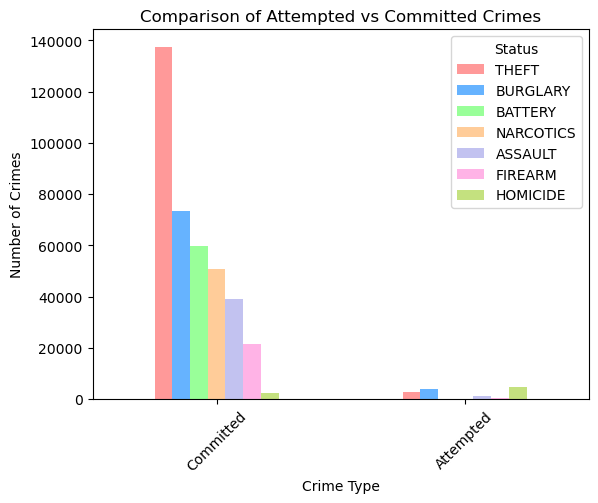

In [53]:
# Define a list of colors for each crime type
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#c4e17f']

# Plotting the bar chart with custom colors
ax = attmpt_cmmt_bytype_df.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.title('Comparison of Attempted vs Committed Crimes')
plt.xticks(rotation=45)
plt.legend(title='Status')

In [54]:
# convert dict to df
attmpt_cmmt_bytype_df = pd.DataFrame(attmpt_cmmt_bytype).T
attmpt_cmmt_bytype_df = attmpt_cmmt_bytype_df.rename(columns={'index': 'Crime Type'})
attmpt_cmmt_bytype_df.head(10)

,Committed,Attempted
THEFT,137362,2854
BURGLARY,73216,3911
BATTERY,59757,157
NARCOTICS,50876,116
ASSAULT,39002,1107
FIREARM,21305,229
HOMICIDE,2169,4819


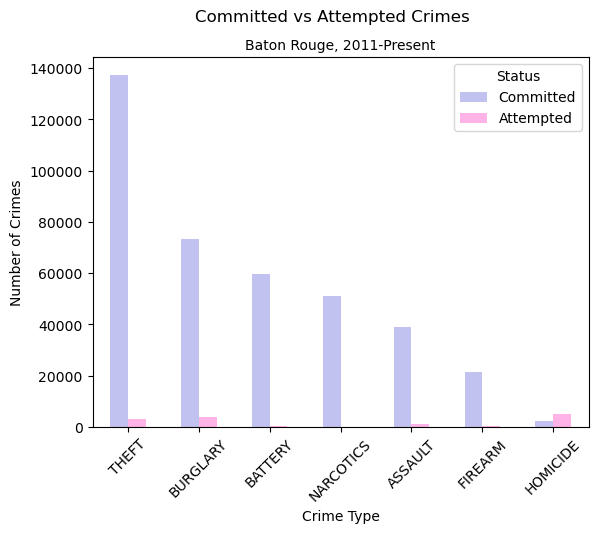

In [55]:
# Define a list of colors for each crime type
colors = ['#c2c2f0','#ffb3e6']
# red: '#ff9999' 
# blue: '#66b3ff'
# green: '#99ff99'
# orange: '#ffcc99'
# purple: '#c2c2f0'
# pink: '#ffb3e6'
# yellow-green '#c4e17f'

# Plotting the bar chart with custom colors
ax = attmpt_cmmt_bytype_df.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.suptitle('Committed vs Attempted Crimes')
plt.title('Baton Rouge, 2011-Present', fontsize='medium')
plt.xticks(rotation=45)
plt.legend(title='Status')
pass

In [56]:
# altair color scheme category20 hex codes

scheme_cat20 = colors = [ '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', 
                          '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', 
                          '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5' 
                          ]

greens = ['#2ca02c', '#98df8a']

In [57]:
attmpt_cmmt_bytype_df.reset_index(inplace=True)
attmpt_cmmt_bytype_df = attmpt_cmmt_bytype_df.rename(columns={'index':'Crime Type'})
attmpt_cmmt_bytype_df.head()

,Crime Type,Committed,Attempted
0,THEFT,137362,2854
1,BURGLARY,73216,3911
2,BATTERY,59757,157
3,NARCOTICS,50876,116
4,ASSAULT,39002,1107


In [58]:
attmpt_cmmt_bytype_df_long = attmpt_cmmt_bytype_df.melt(id_vars='Crime Type', var_name='Status', value_name='Number of Crimes')
attmpt_cmmt_bytype_df_long.head()

,Crime Type,Status,Number of Crimes
0,THEFT,Committed,137362
1,BURGLARY,Committed,73216
2,BATTERY,Committed,59757
3,NARCOTICS,Committed,50876
4,ASSAULT,Committed,39002


In [59]:
# Create the grouped bar chart with Altair

# Calculate the total number of committed crimes for sorting
crime_type_order = attmpt_cmmt_bytype_df.sort_values(by='Committed', ascending=False)['Crime Type'].tolist()
chart = alt.Chart(attmpt_cmmt_bytype_df_long).mark_bar().encode(
    x=alt.X('Crime Type:N', title='Crime Type', axis=alt.Axis(labelAngle=45), sort=crime_type_order),
    y=alt.Y('Number of Crimes:Q', title='Number of Crimes'),
    color=alt.Color('Status:N', title='Status', scale=alt.Scale(scheme='category20')),
    xOffset=alt.XOffset('Status:N', sort=['Committed', 'Attempted'])
).properties(
    title='Committed vs Attempted Crimes in Baton Rouge, 2011-Present',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

chart.display()

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

adding screenshots of altair graphs since they aren't rendering in github despite rendering locally
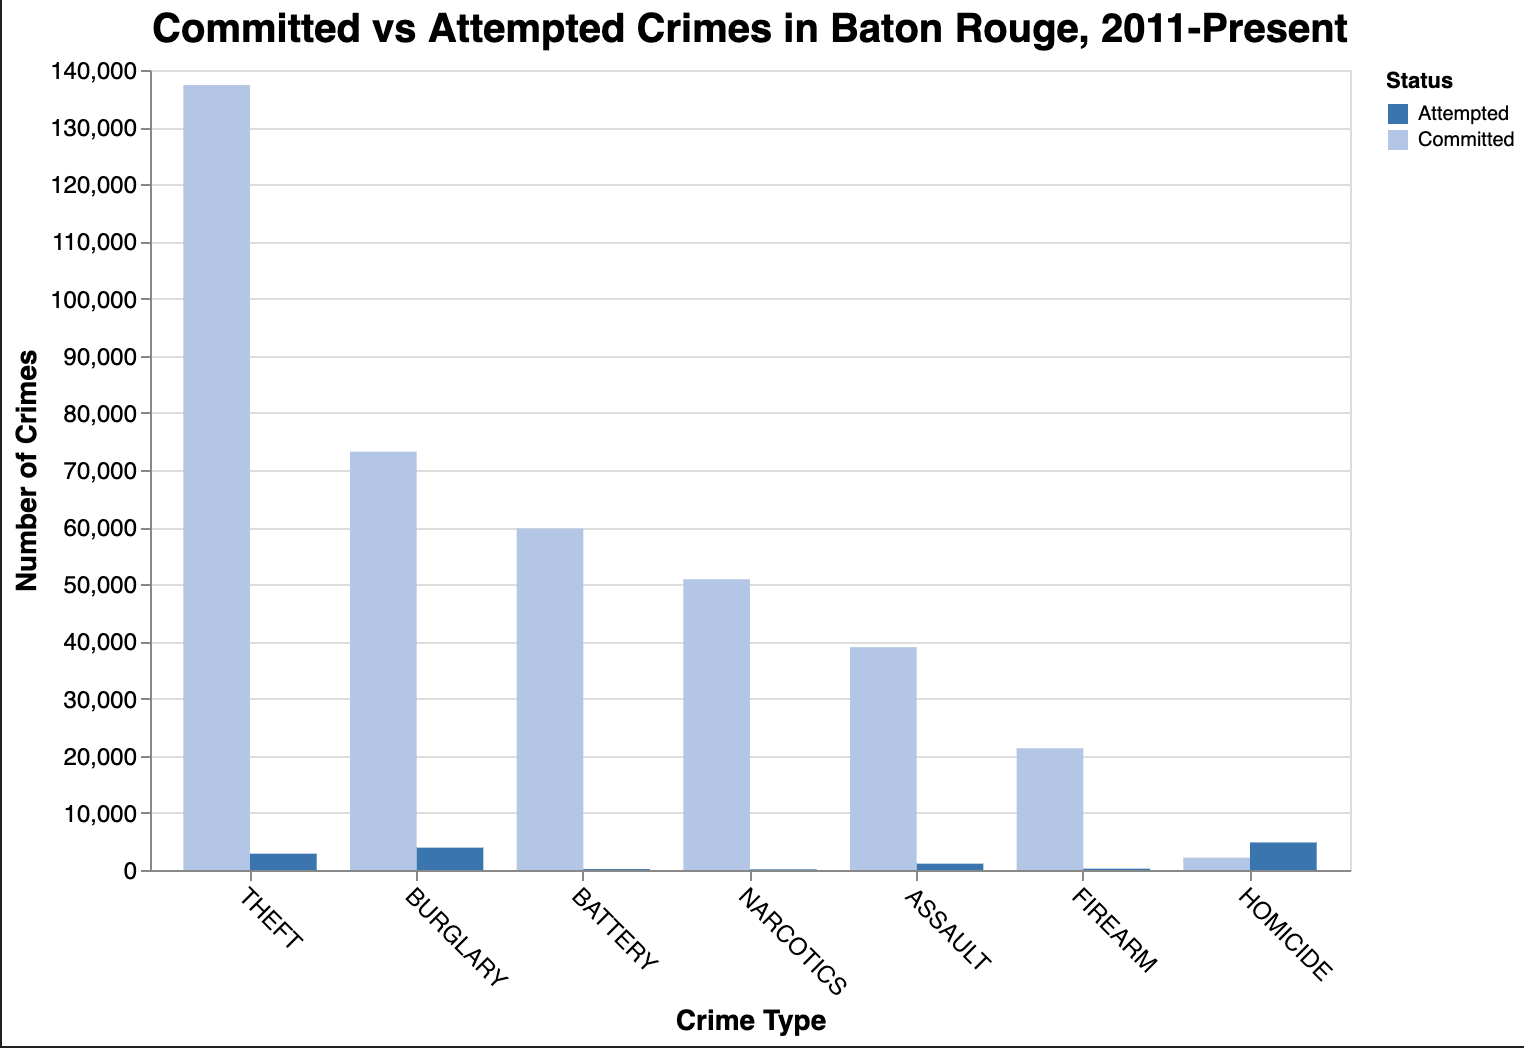

# Attempted vs Committed Crimes in EBRP, 2021-Present

In [60]:
# please note that i created these graphs before learning about groupby

In [61]:
# build on dictionary to stratify by attempted vs committed

ebrp_cat = {
    'THEFT': {
        'Committed': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'] == 'THEFT') &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'COMMITTED')].shape[0]), 
        'Attempted': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'] == 'THEFT') &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'ATTEMPTED')].shape[0])     
    },

    'BURGLARY': {
        'Committed': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'].isin(burglary_types)) &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'COMMITTED')].shape[0]),
        'Attempted': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'].isin(burglary_types)) &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'ATTEMPTED')].shape[0])
    },

    'BATTERY': {
        'Committed': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'] == 'BATTERY') &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'COMMITTED')].shape[0]),
        'Attempted': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'] == 'BATTERY') &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'ATTEMPTED')].shape[0])
    },

    'NARCOTICS': {
        'Committed': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'] == 'NARCOTICS') &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'COMMITTED')].shape[0]),
        'Attempted': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'] == 'NARCOTICS') &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'ATTEMPTED')].shape[0])
    },

    'ASSAULT': {
        'Committed': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'].isin(assault_types)) &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'COMMITTED')].shape[0]), 
        'Attempted': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'].isin(assault_types)) &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'ATTEMPTED')].shape[0])       
    },

    'FIREARM': {
        'Committed': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'] == 'FIREARM') &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'COMMITTED')].shape[0]),
        'Attempted': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'] == 'FIREARM') &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'ATTEMPTED')].shape[0])
    },

    'HOMICIDE': {
        'Committed': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'] == 'HOMICIDE') &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'COMMITTED')].shape[0]),
        'Attempted': (baton_rouge_parish_data[(baton_rouge_parish_data['STATUTE_CATEGORY'] == 'HOMICIDE') &
                                              (baton_rouge_parish_data['ATTEMPTED_OR_COMMITTED'] == 'ATTEMPTED')].shape[0])      
    },
}    

ebrp_cat

{'THEFT': {'Committed': 53604, 'Attempted': 1550},
 'BURGLARY': {'Committed': 23291, 'Attempted': 1059},
 'BATTERY': {'Committed': 22616, 'Attempted': 10},
 'NARCOTICS': {'Committed': 13096, 'Attempted': 13},
 'ASSAULT': {'Committed': 11003, 'Attempted': 239},
 'FIREARM': {'Committed': 6611, 'Attempted': 87},
 'HOMICIDE': {'Committed': 611, 'Attempted': 2857}}

In [62]:
df_ebrp_cat = pd.DataFrame(ebrp_cat).T
df_ebrp_cat.head()

,Committed,Attempted
THEFT,53604,1550
BURGLARY,23291,1059
BATTERY,22616,10
NARCOTICS,13096,13
ASSAULT,11003,239


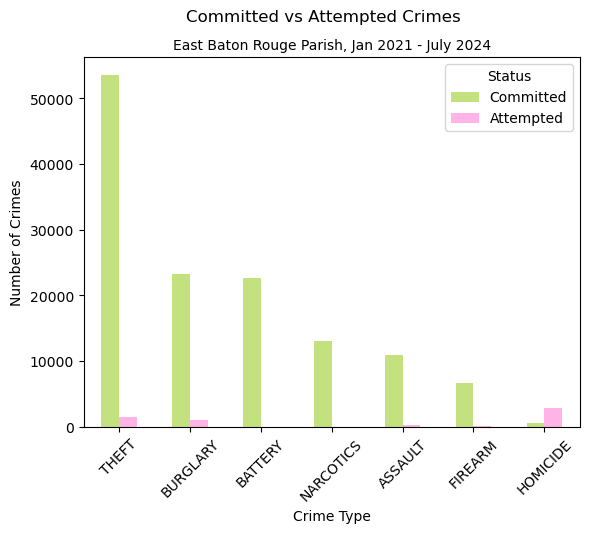

In [63]:
colors = ['#c4e17f','#ffb3e6']
ax = df_ebrp_cat.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.suptitle('Committed vs Attempted Crimes')
plt.title('East Baton Rouge Parish, Jan 2021 - July 2024', fontsize='medium')
plt.xticks(rotation=45)
plt.legend(title='Status')
pass

In [64]:
# CONVERT TO ALTAIR

# Convert dictionary to DataFrame
ebrp_df = pd.DataFrame(ebrp_cat).T.reset_index()
ebrp_df = ebrp_df.rename(columns={'index': 'Crime Type'})

# Convert to long format
ebrp_df_long = ebrp_df.melt(id_vars='Crime Type', var_name='Status', value_name='Number of Crimes')

# Display the DataFrame
ebrp_df_long.head(20)

,Crime Type,Status,Number of Crimes
0,THEFT,Committed,53604
1,BURGLARY,Committed,23291
2,BATTERY,Committed,22616
3,NARCOTICS,Committed,13096
4,ASSAULT,Committed,11003
5,FIREARM,Committed,6611
6,HOMICIDE,Committed,611
7,THEFT,Attempted,1550
8,BURGLARY,Attempted,1059
9,BATTERY,Attempted,10


In [65]:
# Create the grouped bar chart with Altair

# Calculate the total number of committed crimes for sorting
crime_type_order = ebrp_df.sort_values(by='Committed', ascending=False)['Crime Type'].tolist()
chart = alt.Chart(ebrp_df_long).mark_bar().encode(
    x=alt.X('Crime Type:N', title='Crime Type', axis=alt.Axis(labelAngle=45), sort=crime_type_order),
    y=alt.Y('Number of Crimes:Q', title='Number of Crimes'),
    color=alt.Color('Status:N', title='Status', scale=alt.Scale(range=greens)),
    xOffset=alt.XOffset('Status:N', sort=['Committed', 'Attempted'])
).properties(
    title='Committed vs Attempted Crimes in East Baton Rouge Parish, 2021-Present',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

chart.display()

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

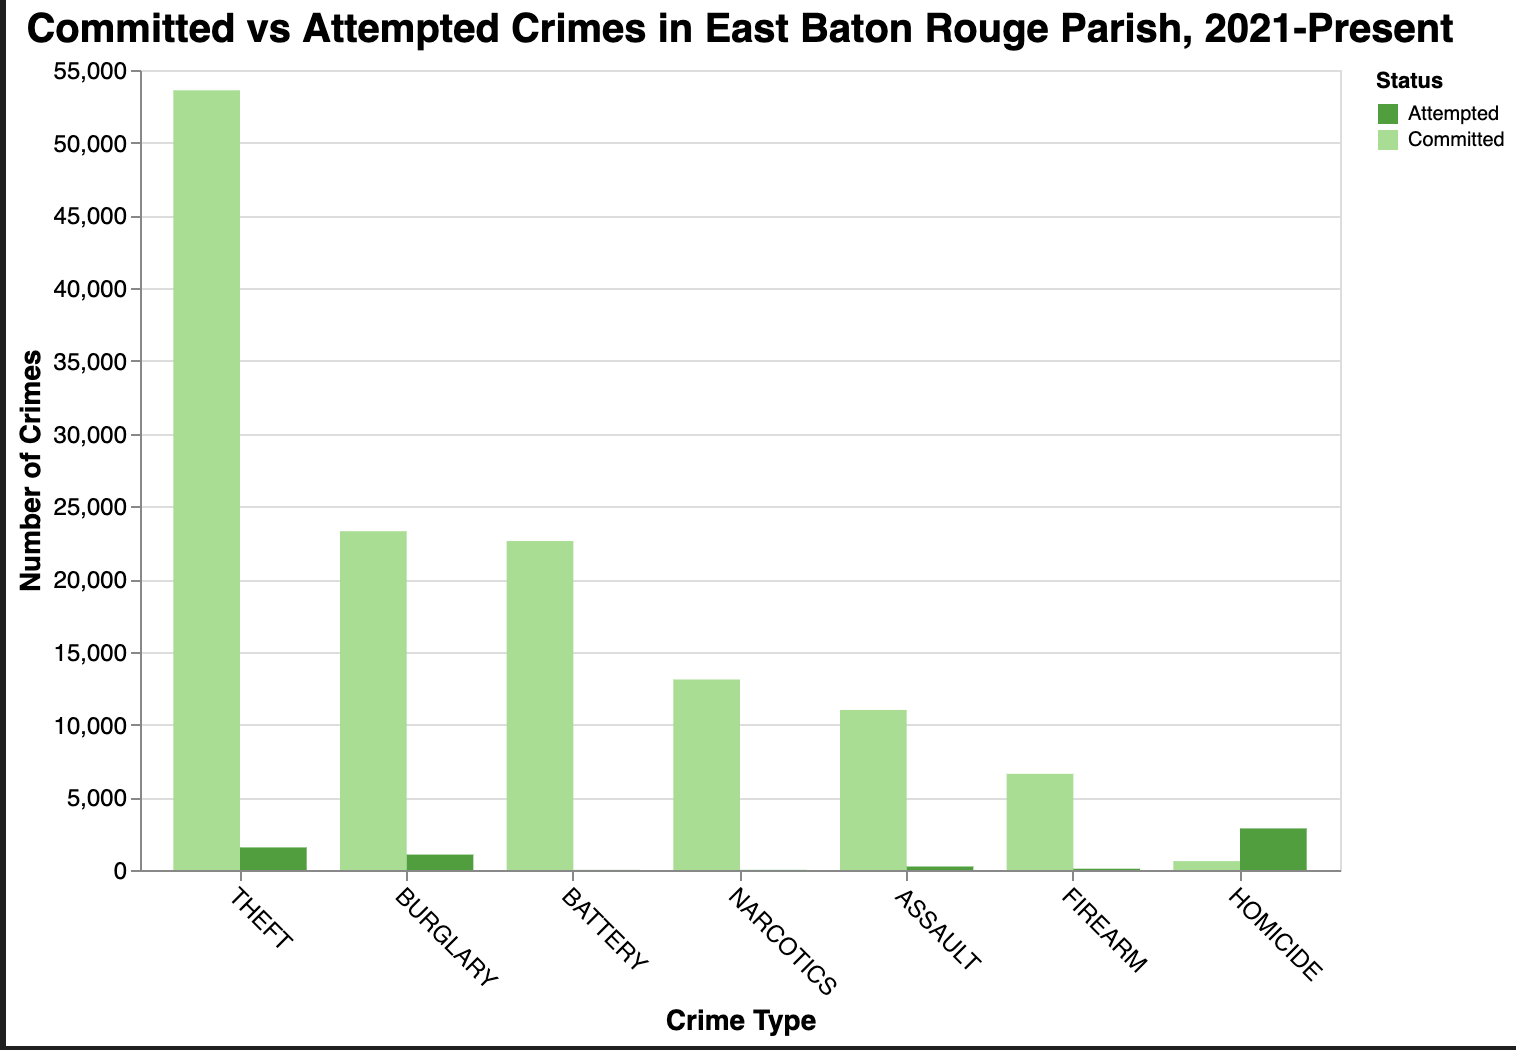

# Does temperature affect crime rate?

In [66]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110139 entries, 0 to 110138
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         110139 non-null  int64  
 1   name               110139 non-null  object 
 2   date               110139 non-null  object 
 3   avg_wind_sp        4944 non-null    float64
 4   peak_gust          360 non-null     float64
 5   precip             108366 non-null  float64
 6   max_temp           7976 non-null    float64
 7   min_temp           7978 non-null    float64
 8   2min_windsp        4947 non-null    float64
 9   5sec_windsp        4910 non-null    float64
 10  thunder            2020 non-null    float64
 11  smoke_or_haze      619 non-null     float64
 12  high_or_dmg_winds  13 non-null      float64
 13  rain               309 non-null     float64
dtypes: float64(11), int64(1), object(2)
memory usage: 11.8+ MB


In [67]:
# convert date to dt
weather['date'] = pd.to_datetime(weather['date'])

In [68]:
# drop unnamed col
weather.drop('Unnamed: 0', axis=1, inplace=True)

In [69]:
# let's look at ebrp 2021-present
# get average high temperature for each month
# get total number of crimes for each month

In [70]:
# create new dataframe
avg_maxtemp = weather[['name','date','max_temp']]

In [71]:
avg_maxtemp.head()

,name,date,max_temp
0,"ADDIS 1.7 N, LA US",2013-08-23,NaN
1,"ADDIS 1.7 N, LA US",2013-09-14,NaN
2,"ADDIS 1.7 N, LA US",2013-09-20,NaN
3,"ADDIS 1.7 N, LA US",2013-09-21,NaN
4,"ADDIS 1.7 N, LA US",2013-09-22,NaN


In [72]:
# filter out dates we don't need
avg_maxtemp = avg_maxtemp[avg_maxtemp.date >= '2021.01.01']

In [73]:
avg_maxtemp.head()

,name,date,max_temp
1548,"PORT ALLEN 3.7 SSW, LA US",2023-07-01,NaN
1549,"PORT ALLEN 3.7 SSW, LA US",2023-07-02,NaN
1550,"PORT ALLEN 3.7 SSW, LA US",2023-07-03,NaN
1551,"PORT ALLEN 3.7 SSW, LA US",2023-07-04,NaN
1552,"PORT ALLEN 3.7 SSW, LA US",2023-07-05,NaN


In [74]:
val_counts(avg_maxtemp)

Column name: name
name
BATON ROUGE SHERWOOD, LA US         1295
BATON ROUGE METRO AIRPORT, LA US    1294
CENTRAL 2.2 SE, LA US               1292
PLAQUEMINE 2 N, LA US               1274
ST. GABRIEL 2.8 NNW, LA US          1271
SHENANDOAH 1.5 E, LA US             1263
PORT ALLEN, LA US                   1255
DENHAM SPRINGS 6.8 N, LA US         1242
LSU, LA US                          1237
BATON ROUGE 3.5 E, LA US            1234
BATON ROUGE 4.0 SSE, LA US          1216
BATON ROUGE 3.0 SSE, LA US          1193
BROWNFIELDS 5.8 NE, LA US           1171
SHENANDOAH 1.5 S, LA US             1045
BATON ROUGE 2.5 E, LA US             921
BATON ROUGE 6.2 SSE, LA US           915
BROWNFIELDS 4.0 E, LA US             822
BAKER, LA US                         804
WATSON 1.1 S, LA US                  528
BATON ROUGE 4.4 S, LA US             516
GARDERE 2.5 SE, LA US                472
ST GABRIEL 4.4 NNE, LA US            370
BATON ROUGE 0.5 ESE, LA US           350
PORT ALLEN 3.7 SSW, LA US         

In [75]:
# group by date with avg of temp
print(f'shape befor drop: {avg_maxtemp.shape}')

avg_maxtemp = avg_maxtemp.groupby('date').agg({
    'name':'first',
    'max_temp':'mean'
})

print(f'shape after drop: {avg_maxtemp.shape}')

shape befor drop: (24419, 3)
shape after drop: (1295, 2)


In [76]:
avg_maxtemp.head()

,name,max_temp
date,,
2021-01-01,"PORT ALLEN, LA US",62.0
2021-01-02,"PORT ALLEN, LA US",50.0
2021-01-03,"PORT ALLEN, LA US",60.0
2021-01-04,"PORT ALLEN, LA US",72.0
2021-01-05,"PORT ALLEN, LA US",70.0


In [77]:
# rename col more appropriately
avg_maxtemp = avg_maxtemp.rename(columns={'max_temp':'avg_max_temp'})
avg_maxtemp.head()

,name,avg_max_temp
date,,
2021-01-01,"PORT ALLEN, LA US",62.0
2021-01-02,"PORT ALLEN, LA US",50.0
2021-01-03,"PORT ALLEN, LA US",60.0
2021-01-04,"PORT ALLEN, LA US",72.0
2021-01-05,"PORT ALLEN, LA US",70.0


In [78]:
# ensure date filtered properly
avg_maxtemp.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12',
               '2024-07-13', '2024-07-14', '2024-07-15', '2024-07-16',
               '2024-07-17', '2024-07-18'],
              dtype='datetime64[ns]', name='date', length=1295, freq=None)

In [79]:
# get crime counts

In [80]:
# create chargedate as datetime
baton_rouge_parish_data['charge_dt'] = pd.to_datetime(baton_rouge_parish_data['CHARGE_DATE'])
baton_rouge_parish_data.head()

/var/folders/89/572hqr1x26j5sf69pfl_2fd80000gn/T/ipykernel_28255/3525800509.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  baton_rouge_parish_data['charge_dt'] = pd.to_datetime(baton_rouge_parish_data['CHARGE_DATE'])


,AGENCY,INCIDENT_NUMBER,CHARGE_ID,SUPPLEMENTAL,CHARGE_DATE,REPORT_DATE,APPROVED_DATE,ATTEMPTED_OR_COMMITTED,CITY,STATE,ZIP_CODE,DISTRICT,ZONE,SUBZONE,STATUTE_TITLE,STATUTE_DESCRIPTION,STATUTE_CATEGORY,CRIME_AGAINST,COUNCIL_DISTRICT,CRIME_PREVENTION_DISTRICT,NEIGHBORHOOD,charge_dt
0,BRPD,23-087127,D607D172-E178-409D-AEB1-1E7AB454849F,0.0,08/30/2023 04:51:36 PM,08/30/2023 05:00:32 PM,09/08/2023 08:26:03 AM,COMMITTED,BATON ROUGE,LA,70802.0,5,5A,5A1,13:106.2,URINATING IN PUBLIC/CC,NUISANCE,NaN,NaN,NaN,NaN,2023-08-30 16:51:36
1,BRPD,21-024820,8ED44BF4-B4C4-441D-B388-4A527668C62F,1.0,03/17/2021 11:44:00 AM,03/17/2021 12:01:06 PM,09/03/2021 01:20:51 PM,COMMITTED,BATON ROUGE,LA,70805.0,4,4E,4E2,32:863,PROOF OF INSURANCE REQ,TRAFFIC,NaN,NaN,NaN,NaN,2021-03-17 11:44:00
2,BRPD,20-015806,11241477-EE66-43C7-B505-7C8082A70C16,4.0,09/10/2020 12:00:00 PM,09/08/2023 05:52:09 AM,09/08/2023 06:32:25 AM,COMMITTED,BATON ROUGE,LA,70802.0,NaN,NaN,NaN,14:67,THEFT,THEFT,PROPERTY,NaN,NaN,NaN,2020-09-10 12:00:00
3,BRPD,20-064955,38887E1F-48AB-40B3-8252-0364351BB3A0,5.0,07/26/2020 12:18:00 PM,10/19/2023 06:56:57 PM,10/19/2023 07:07:49 PM,COMMITTED,BATON ROUGE,LA,70802.0,NaN,NaN,NaN,32:415,D/L SUSP/REV,TRAFFIC,NaN,NaN,NaN,NaN,2020-07-26 12:18:00
4,BRPD,23-087127,8F1536E8-F6AC-4732-89FC-9E360B95DF26,0.0,08/30/2023 04:51:36 PM,08/30/2023 05:00:32 PM,09/08/2023 08:26:03 AM,COMMITTED,BATON ROUGE,LA,70802.0,5,5A,5A1,6:428,LITTER IN PUBLIC PLACES,NUISANCE,NaN,NaN,NaN,NaN,2023-08-30 16:51:36


In [81]:
# extract date only
baton_rouge_parish_data['charge_ymd'] = baton_rouge_parish_data['charge_dt'].dt.date
baton_rouge_parish_data.head()

,AGENCY,INCIDENT_NUMBER,CHARGE_ID,SUPPLEMENTAL,CHARGE_DATE,REPORT_DATE,APPROVED_DATE,ATTEMPTED_OR_COMMITTED,CITY,STATE,ZIP_CODE,DISTRICT,ZONE,SUBZONE,STATUTE_TITLE,STATUTE_DESCRIPTION,STATUTE_CATEGORY,CRIME_AGAINST,COUNCIL_DISTRICT,CRIME_PREVENTION_DISTRICT,NEIGHBORHOOD,charge_dt,charge_ymd
0,BRPD,23-087127,D607D172-E178-409D-AEB1-1E7AB454849F,0.0,08/30/2023 04:51:36 PM,08/30/2023 05:00:32 PM,09/08/2023 08:26:03 AM,COMMITTED,BATON ROUGE,LA,70802.0,5,5A,5A1,13:106.2,URINATING IN PUBLIC/CC,NUISANCE,NaN,NaN,NaN,NaN,2023-08-30 16:51:36,2023-08-30
1,BRPD,21-024820,8ED44BF4-B4C4-441D-B388-4A527668C62F,1.0,03/17/2021 11:44:00 AM,03/17/2021 12:01:06 PM,09/03/2021 01:20:51 PM,COMMITTED,BATON ROUGE,LA,70805.0,4,4E,4E2,32:863,PROOF OF INSURANCE REQ,TRAFFIC,NaN,NaN,NaN,NaN,2021-03-17 11:44:00,2021-03-17
2,BRPD,20-015806,11241477-EE66-43C7-B505-7C8082A70C16,4.0,09/10/2020 12:00:00 PM,09/08/2023 05:52:09 AM,09/08/2023 06:32:25 AM,COMMITTED,BATON ROUGE,LA,70802.0,NaN,NaN,NaN,14:67,THEFT,THEFT,PROPERTY,NaN,NaN,NaN,2020-09-10 12:00:00,2020-09-10
3,BRPD,20-064955,38887E1F-48AB-40B3-8252-0364351BB3A0,5.0,07/26/2020 12:18:00 PM,10/19/2023 06:56:57 PM,10/19/2023 07:07:49 PM,COMMITTED,BATON ROUGE,LA,70802.0,NaN,NaN,NaN,32:415,D/L SUSP/REV,TRAFFIC,NaN,NaN,NaN,NaN,2020-07-26 12:18:00,2020-07-26
4,BRPD,23-087127,8F1536E8-F6AC-4732-89FC-9E360B95DF26,0.0,08/30/2023 04:51:36 PM,08/30/2023 05:00:32 PM,09/08/2023 08:26:03 AM,COMMITTED,BATON ROUGE,LA,70802.0,5,5A,5A1,6:428,LITTER IN PUBLIC PLACES,NUISANCE,NaN,NaN,NaN,NaN,2023-08-30 16:51:36,2023-08-30


In [82]:
# create new df
daily_crime_count = baton_rouge_parish_data.groupby('charge_ymd')['STATUTE_CATEGORY'].count().reset_index()
daily_crime_count.head()

,charge_ymd,STATUTE_CATEGORY
0,1922-06-07,1
1,1922-07-25,1
2,1986-04-17,1
3,2000-03-03,1
4,2000-04-25,1


In [83]:
daily_crime_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   charge_ymd        2108 non-null   object
 1   STATUTE_CATEGORY  2108 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


In [84]:
# recast charge_ymd as datetime
daily_crime_count['charge_ymd'] = pd.to_datetime(daily_crime_count['charge_ymd'])

In [85]:
daily_crime_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   charge_ymd        2108 non-null   datetime64[ns]
 1   STATUTE_CATEGORY  2108 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 33.1 KB


In [86]:
# filter out dates we don't need
daily_crime_count = daily_crime_count[daily_crime_count.charge_ymd >= '2021.01.01']
daily_crime_count.head()

,charge_ymd,STATUTE_CATEGORY
816,2021-01-01,137
817,2021-01-02,151
818,2021-01-03,176
819,2021-01-04,200
820,2021-01-05,188


In [87]:
val_counts(daily_crime_count)

Column name: charge_ymd
charge_ymd
2021-01-01    1
2023-06-08    1
2023-05-17    1
2023-05-16    1
2023-05-15    1
             ..
2022-03-06    1
2022-03-05    1
2022-03-04    1
2022-03-03    1
2024-07-15    1
Name: count, Length: 1292, dtype: int64
--------------------------------------------------

Column name: STATUTE_CATEGORY
STATUTE_CATEGORY
190    23
188    22
197    22
212    22
203    21
       ..
129     1
290     1
273     1
268     1
30      1
Name: count, Length: 168, dtype: int64
--------------------------------------------------



In [88]:
# merge avg temp and crime counts - prep/check 
avg_maxtemp.head()

,name,avg_max_temp
date,,
2021-01-01,"PORT ALLEN, LA US",62.0
2021-01-02,"PORT ALLEN, LA US",50.0
2021-01-03,"PORT ALLEN, LA US",60.0
2021-01-04,"PORT ALLEN, LA US",72.0
2021-01-05,"PORT ALLEN, LA US",70.0


In [89]:
daily_crime_count.head()

,charge_ymd,STATUTE_CATEGORY
816,2021-01-01,137
817,2021-01-02,151
818,2021-01-03,176
819,2021-01-04,200
820,2021-01-05,188


In [90]:
# rename cols
daily_crime_count = daily_crime_count.rename(columns={'charge_ymd':'date','STATUTE_CATEGORY':'crime_count'})
daily_crime_count.head()

,date,crime_count
816,2021-01-01,137
817,2021-01-02,151
818,2021-01-03,176
819,2021-01-04,200
820,2021-01-05,188


In [91]:
# merge dfs
temp_crime = pd.merge(avg_maxtemp, daily_crime_count, on='date')
temp_crime.head()

,date,name,avg_max_temp,crime_count
0,2021-01-01,"PORT ALLEN, LA US",62.0,137
1,2021-01-02,"PORT ALLEN, LA US",50.0,151
2,2021-01-03,"PORT ALLEN, LA US",60.0,176
3,2021-01-04,"PORT ALLEN, LA US",72.0,200
4,2021-01-05,"PORT ALLEN, LA US",70.0,188


In [92]:
# drop station name
temp_crime.drop('name',axis=1,inplace=True)

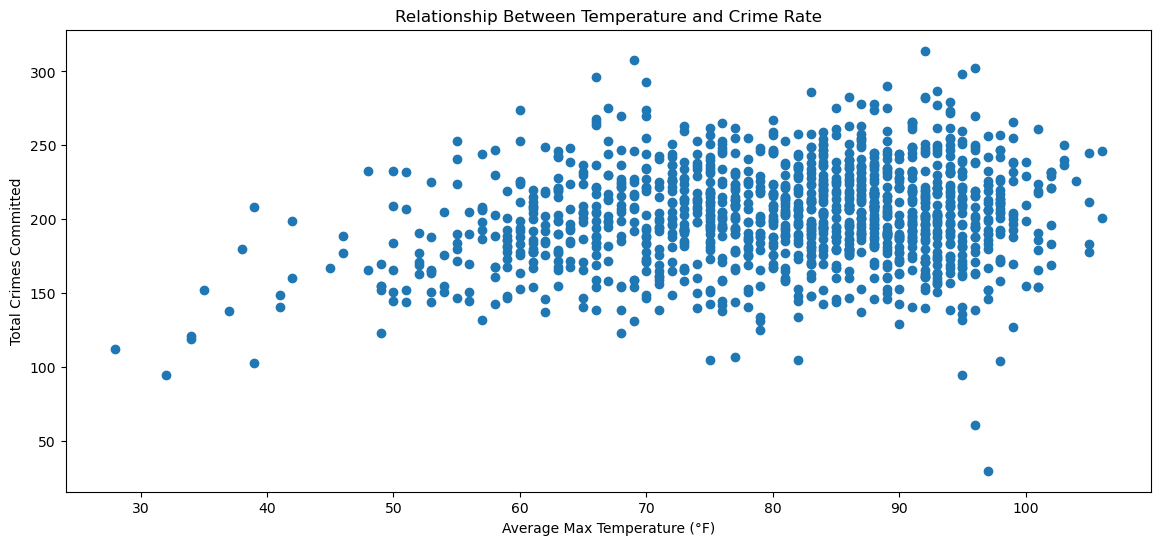

In [93]:
# create plot
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.scatter(temp_crime['avg_max_temp'], temp_crime['crime_count'], label='Average Max Temperature vs Total Crimes')

# titles and labels
ax.set_title('Relationship Between Temperature and Crime Rate')
ax.set_xlabel('Average Max Temperature (°F)')
ax.set_ylabel('Total Crimes Committed')
pass

In [94]:
# re-create scatter plot with Altair
chart = alt.Chart(temp_crime).mark_point().encode(
    x=alt.X('avg_max_temp', title='Average Max Temperature (°F)'),
    y=alt.Y('crime_count', title='Total Crimes Committed'),
    color=alt.Color('temp_category:N', title='Temperature Category', scale=alt.Scale(scheme='category20')),
    tooltip=['avg_max_temp', 'crime_count']
).properties(
    title='Relationship Between Temperature and Crime Rate',
    width=700,
    height=300
).interactive()

chart.display()

alt.Chart(...)

adding screenshot of chart since it isn't rendering in GitHub even though it renders locally
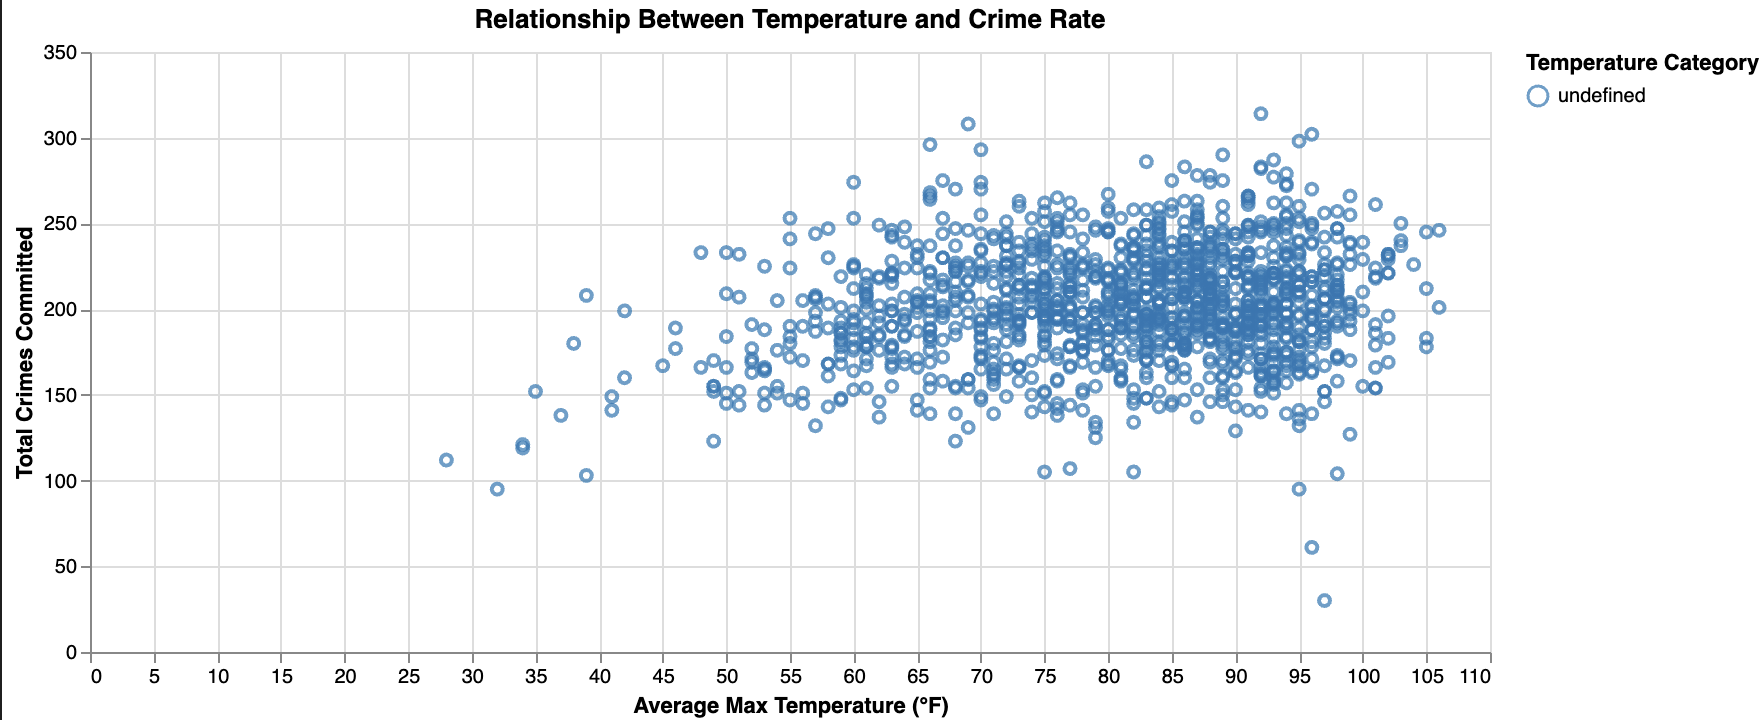

In [95]:
# Define temperature categories
bins = [25, 32, 45, 68, 77, 85, 110]  # Define bins
labels = ['Freezing', 'Cold', 'Cool', 'Comfortable', 'Warm', 'Hot']  # Define labels
temp_crime['temp_category'] = pd.cut(temp_crime['avg_max_temp'], bins=bins, labels=labels)

# Create scatter plot with Altair and color scheme
chart = alt.Chart(temp_crime).mark_point().encode(
    x=alt.X('avg_max_temp', title='Average Max Temperature (°F)'),
    y=alt.Y('crime_count', title='Total Crimes Committed'),
    color=alt.Color('temp_category:N', title='Temperature Category', scale=alt.Scale(scheme='category20')),
    tooltip=['avg_max_temp', 'crime_count', 'temp_category']
).properties(
    title='Relationship Between Temperature and Number of Crimes in East Baton Rouge Parish',
    width=700,
    height=300
).interactive()

chart.display()

alt.Chart(...)

adding screenshot of chart since it isn't rendering in GitHub even though it renders locally
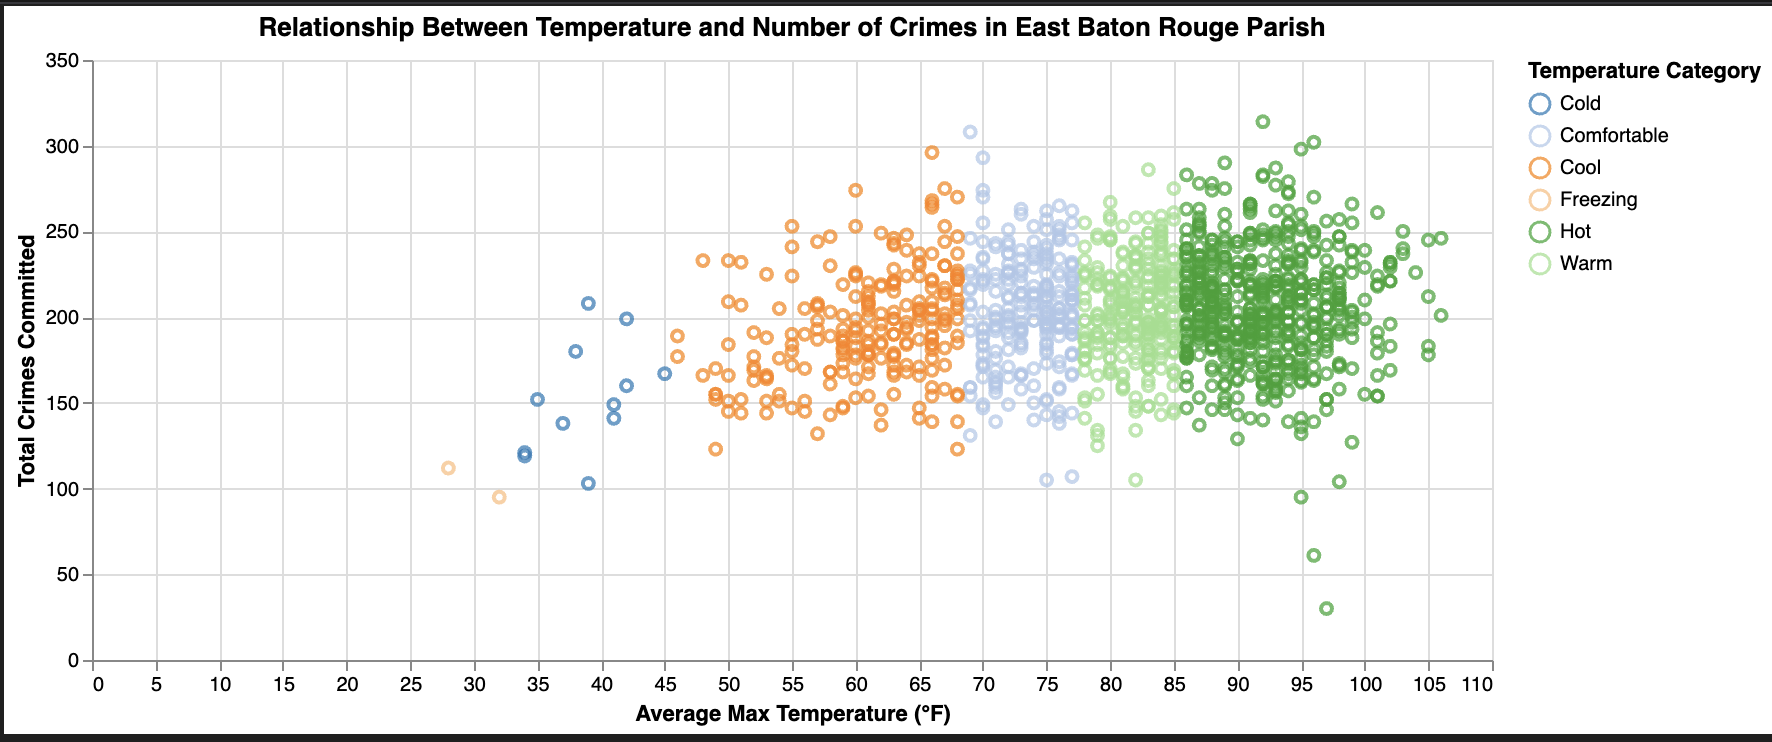

# Do hurricanes affect crime rate? - if i had more time

Graph
- line plot to see trends over time
- hurricane dates illustrated with vertical line

Data
- Use Baton Rouge-specific dataset to see more hurricanes
- Dataframe should include
    - date
    - total count of crimes

If I had more time:
- different types of crimes affected by hurricanes?
